# Сборный проект  "Исследование рынка компьютерных игр"

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные до 2016 года, сейчас как раз декабрь 2016 г., и следует спланировать кампанию на 2017-й. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**

1. Определить суммарные продажи игр по миру
2. Определить актуальный период, который влияет на прогноз на 2017-й год
3. Определить перспективыне платформы и жанры
4. Проверить уровень связи рейтингов и продаж игр
5. Рассмотреть локальные особенности, составить портрет пользователя для каждого из трех крупных регионов (NA, EU, JP)
6. Проверить гипотезы о равенстве рейтингов для тех или иных видов игр

**Ход исследования**

Данные об играх и их продажах в файле "games.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимое количество дополнительных колонок и таблиц, и приступлю к проведению анализа

Таким образом, моё исследование пройдёт в шесть этапов:

* Обзор данных
* Предобработка данных
* Исследовательский анализ данных
* Составление портрета игрока по трем крупным регионам
* Проверка гипотез
* Оформление общего вывода по работе

**Описание данных:**  

**Name** — название игры  
**Platform** — платформа  
**Year_of_Release** — год выпуска  
**Genre** — жанр игры  
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)  
**EU_sales** — продажи в Европе (миллионы проданных копий)  
**JP_sales** — продажи в Японии (миллионы проданных копий)  
**Other_sales** — продажи в других странах (миллионы проданных копий)  
**Critic_Score** — оценка критиков (максимум 100)  
**User_Score** — оценка пользователей (максимум 10)  
**Rating** — рейтинг от организации ESRB  

Данные за 2016 год могут быть неполными

__________________

Перед стартом исследования зададим глобальные переменные и подключим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as st

import warnings 

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
warnings.filterwarnings('ignore') # отключаем предупреждения

## Шаг 1. Загрузка данных

In [3]:
try:
    d_games = pd.read_csv('datasets/games.csv', sep=',')
    display(d_games.head(10))
    print()
    d_games.info()
except:
    d_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
    print('Файл загружен из хранилища Яндекс')
    display(d_games.head(10))
    print()
    d_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


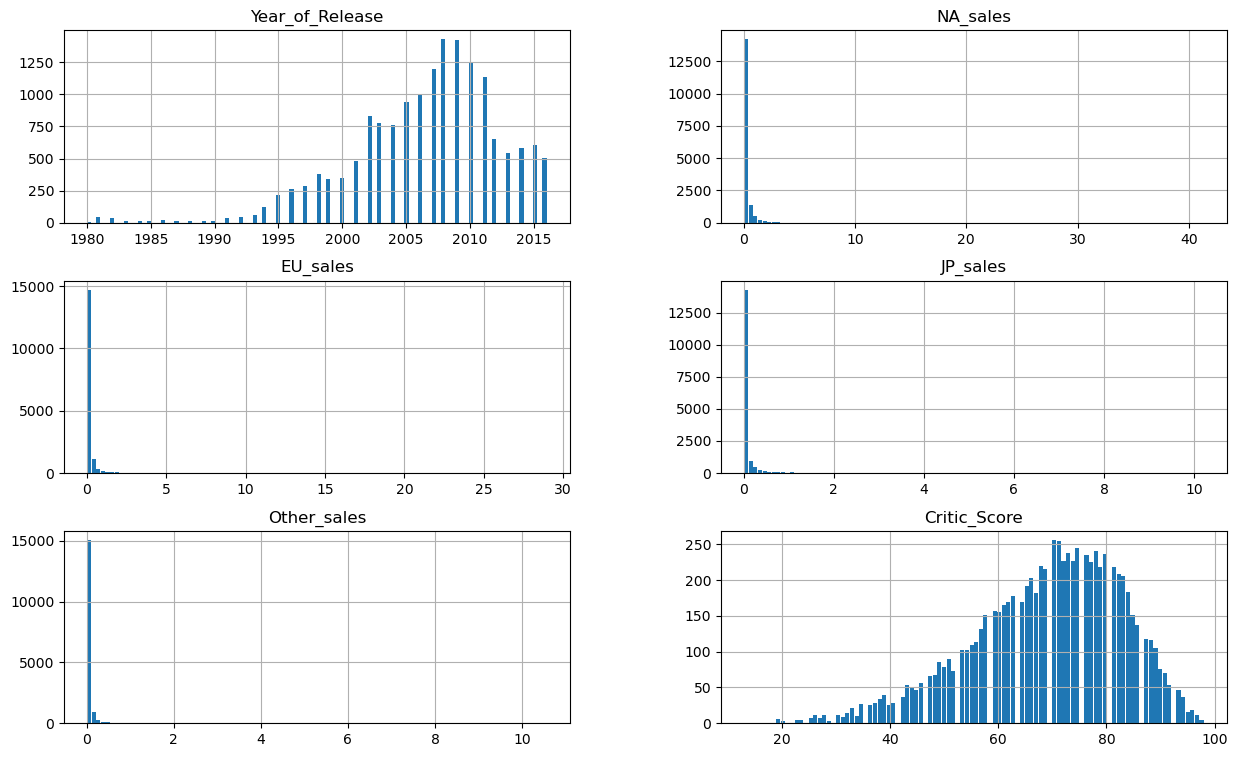

In [4]:
d_games.hist(figsize=(15, 9), rwidth= 0.9, bins = 100);

Объем предобработки предварительно понятен, но по ходу может быть расширен:

* Названия столбцов:
    - Во всех столбцах убрать capital
* Пропуски к обработке:
    - Name
    - Year_of_Release
    - Genre
    - Critic_Score
    - User_Score
    - Rating
* Работа с типами:
    - Year_of_Release
* Проверки на дубликаты:
    - Полные
    - Пара "Name-Platform"
    - Неявные дубликаты в Genre, Platform и Rating
* Иное:
    - Посмотреть, есть ли нули в продажах по всем регионам

## Шаг 2. Предобработка данных

### 2.1 Названия столбцов

Понизим уровень литер и заменим наименования столбцов на более вменяемые:

In [5]:
d_games = d_games.rename(columns={'Name':'game', 'Platform':'platform_reduct', 'Year_of_Release':'year_of_release', \
                                  'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', \
                                  'Other_sales':'other_sales', 'Critic_Score':'critic_rating', 'User_Score':'user_rating', \
                                  'Rating':'esrb_rating'})

Так уже понятнее

In [6]:
d_games.columns

Index(['game', 'platform_reduct', 'year_of_release', 'genre', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'critic_rating', 'user_rating',
       'esrb_rating'],
      dtype='object')

### 2.2 Пропуски и некорректные типы к обработке

Для более вдумчивой обработки пропусков предлагаю добавить подробности о консолях - сокращенные названия не дают ообой информации:

In [7]:
d_games.platform_reduct.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Ничего не понятно  

Сооружаем справочник игровых платформ, добавляем туда информацию о:
- Полное название платформы
- Тип платформы
- Поколение платформы
- Компания производитель/разработчик

In [8]:
d_platform = pd.DataFrame({'platform_reduct' : ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', \
                                                'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', \
                                                'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'],\
#                            Полное название платформы
                           'platform_name' : ['Nintendo Wii', 'Nintendo Entertainment System', 'Nintendo Game Boy', \
                                              'Nintendo DS', 'Xbox 360', 'PlayStation 3', 'PlayStation 2', \
                                              'Super Nintendo Entertainment System', 'Game Boy Advance', 'PlayStation 4', \
                                              'Nintendo 3DS', 'Nintendo 64', 'PlayStation', 'Xbox', 'Personal computer', \
                                              'Atari 2600', 'PlayStation Portable', 'Xbox One', 'Wii U', 'Nintendo GameCube', \
                                              'Sega Mega Drive', 'Sega Dreamcast', 'PlayStation Vita', 'Sega Saturn', \
                                              'Sega Mega-CD', 'WonderSwan', 'Neo Geo CD', 'TurboGrafx-16', \
                                              '3DO Interactive Multiplayer', 'Sega Game Gear', 'PC-FX'], \
#                            Тип платформы
                           'platform_type' : ['Консоль', 'Консоль', 'Портативка', 'Портативка', 'Консоль', 'Консоль', \
                                              'Консоль', 'Консоль', 'Портативка', 'Консоль', 'Портативка', 'Консоль', \
                                              'Консоль', 'Консоль', 'ПК', 'Консоль', 'Портативка', 'Консоль', 'Консоль', \
                                              'Консоль', 'Консоль', 'Консоль', 'Портативка', 'Консоль', 'Доп к консоли', \
                                              'Портативка', 'Консоль', 'Консоль', 'Консоль', 'Портативка', 'Консоль'], \
#                            Поколение платформы
                           'platform_gen' : ['7', '3', '4', '7', '7', '7', '6', '4', '6', '8', '8', '5', '5', '6', '-1', \
                                             '2', '7', '8', '8', '6', '4', '6', '8', '5', '4', '5', '4', '4', '5', '4', '5'], \
#                            Компания производитель/разработчик
                           'platform_company' : ['Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Microsoft', 'Sony', \
                                                 'Sony', 'Nintendo', 'Nintendo', 'Sony', 'Nintendo', 'Nintendo', 'Sony', \
                                                 'Microsoft', 'a lot of companies (for PC)', 'Atari', 'Sony', 'Microsoft', \
                                                 'Nintendo', 'Nintendo', 'Sega', 'Sega', 'Sony', 'Sega', 'Sega', 'Bandai', \
                                                 'SNK Corporation', 'NEC', 'The 3DO Company', 'Sega', 'NEC']})

Посмотрим, что у нас получилось:

In [9]:
d_platform

,platform_reduct,platform_name,platform_type,platform_gen,platform_company
0,Wii,Nintendo Wii,Консоль,7,Nintendo
1,NES,Nintendo Entertainment System,Консоль,3,Nintendo
2,GB,Nintendo Game Boy,Портативка,4,Nintendo
3,DS,Nintendo DS,Портативка,7,Nintendo
4,X360,Xbox 360,Консоль,7,Microsoft
5,PS3,PlayStation 3,Консоль,7,Sony
6,PS2,PlayStation 2,Консоль,6,Sony
7,SNES,Super Nintendo Entertainment System,Консоль,4,Nintendo
8,GBA,Game Boy Advance,Портативка,6,Nintendo
9,PS4,PlayStation 4,Консоль,8,Sony


Отлично.

Осталось прикрутить справочник к нашему датафрейму:

In [10]:
d_games = d_games.merge(right=d_platform, how='left', left_on='platform_reduct', right_on='platform_reduct')

In [11]:
# Меняем местами колонки:
d_games = d_games[['game', 'platform_reduct', 'platform_name', 'platform_type', 'platform_gen', 'platform_company', \
                   'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_rating', \
                   'user_rating', 'esrb_rating']]
d_games.head(5)

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating
0,Wii Sports,Wii,Nintendo Wii,Консоль,7,Nintendo,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,Nintendo Entertainment System,Консоль,3,Nintendo,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Nintendo Wii,Консоль,7,Nintendo,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,Nintendo Wii,Консоль,7,Nintendo,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,Nintendo Game Boy,Портативка,4,Nintendo,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2.1 Пропуски 'name'

In [12]:
d_games.loc[d_games.game.isna(), :]

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating
659,NaN,GEN,Sega Mega Drive,Консоль,4,Sega,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,Sega Mega Drive,Консоль,4,Sega,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Заполнены только год выхода, продажи и платформа.
Есть подозрение, что в название иероглифы попали -- игра японская.  
Эти две строчки идут к удалению

In [13]:
d_games = d_games.dropna(subset=['game'])

#### 2.2.2 Пропуски/тип 'year_of_release'

269 игр без года выхода.   
Посмотрим внимательнее:

In [14]:
d_games.loc[d_games.year_of_release.isna(), :].head(5)

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating
183,Madden NFL 2004,PS2,PlayStation 2,Консоль,6,Sony,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,PlayStation 2,Консоль,6,Sony,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,Nintendo Wii,Консоль,7,Nintendo,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,PlayStation 2,Консоль,6,Sony,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,Atari 2600,Консоль,2,Atari,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Замечаем, что иногда последние четыре символа названия -- год выхода игры.  

Положим их в "year_of_release",  
там, где не цифры, поистим,  
посмотрим, что получилось:

In [15]:
# В пустые 'year_of_release' кладем последние сетыре символа из 'game'
d_games.loc[d_games.year_of_release.isna(), 'year_of_release'] = d_games.loc[d_games.year_of_release.isna(), 'game'].str[-4:]

In [16]:
# Убираем мусор
d_games.loc[(d_games.year_of_release.str.isdigit() == False), 'year_of_release'] = np.nan

In [17]:
# Смотрим, что получилось:
display(d_games.year_of_release.unique())
print()
display(d_games.loc[(d_games.year_of_release.isna()), 'game'].count())

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, '2004',
       1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0, nan, '2006',
       '2003', '2002', '2005', '2011', '2008', '2007'], dtype=object)

254

Спасли пятнадцать игр, остальное удаляем, сразу переводим в 'int'  
Ничего не мешает мне пробежаться по 254-м играм и внести год выхода каждой, но я уже на справочнике консолей устал

In [18]:
# Сносим:
d_games = d_games.dropna(subset=['year_of_release'])

In [19]:
# Переводим тип в 'int'
d_games.year_of_release = d_games.year_of_release.astype(int)

In [20]:
d_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16459 entries, 0 to 16714
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game              16459 non-null  object 
 1   platform_reduct   16459 non-null  object 
 2   platform_name     16459 non-null  object 
 3   platform_type     16459 non-null  object 
 4   platform_gen      16459 non-null  object 
 5   platform_company  16459 non-null  object 
 6   year_of_release   16459 non-null  int32  
 7   genre             16459 non-null  object 
 8   na_sales          16459 non-null  float64
 9   eu_sales          16459 non-null  float64
 10  jp_sales          16459 non-null  float64
 11  other_sales       16459 non-null  float64
 12  critic_rating     7994 non-null   float64
 13  user_rating       9850 non-null   object 
 14  esrb_rating       9778 non-null   object 
dtypes: float64(5), int32(1), object(9)
memory usage: 1.9+ MB


С year_of_release закончили.

#### 2.2.3 Пропуски 'genre'

Две игры без жанра удалили в шаге 2.2.1, больше нет

#### 2.2.4 Пропуски/тип 'critic_rating', 'user_rating'

Пропусков по рейтингу много -- 40% пропущено для пользователей, 51% для критиков

Удалять, ясное дело, пропуски не будем, но нужно понять, что лежит внутри.

In [21]:
d_games.critic_rating.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [22]:
d_games.user_rating.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd -- to be determined, для нас это то же самое, что и nan, по большому счету
Поэтому:

1. tbd -> nan
2. user_rating -> float
3. user_rating *= 10 Выровняем границы для рейтингов пользователей и критиков, чтоб удобнее было графики смотреть

In [23]:
# Убираем tbd
d_games.loc[d_games.user_rating == 'tbd', 'user_rating'] = np.nan
# Меняем тип на float
d_games.user_rating = d_games.user_rating.astype('float')
# Умножем пользовательский рейтинг на 10
d_games.user_rating *= 10
# Проверяем:
d_games.user_rating.unique()

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

Есть ли закономерность в том, где были пропущены оценки?
Посмотрим, как распределены игры без рейтинга по платформам, на которых они выходили:

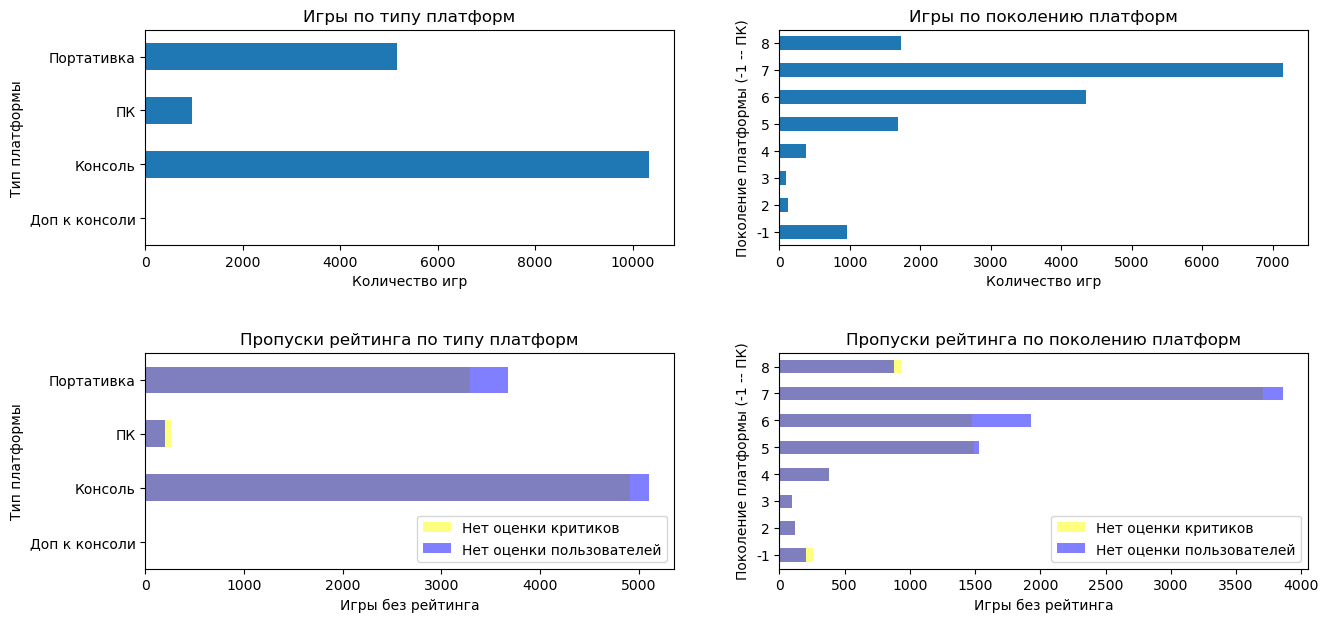

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,7))
plt.subplots_adjust(hspace=0.5) 

d_games.groupby('platform_type')['platform_type'].count().plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Игры по типу платформ') 
ax[0, 0].set_xlabel('Количество игр') 
ax[0, 0].set_ylabel('Тип платформы') 

d_games.groupby('platform_gen')['platform_gen'].count().plot(kind='barh', ax=ax[0, 1])
ax[0, 1].set_title('Игры по поколению платформ') 
ax[0, 1].set_xlabel('Количество игр') 
ax[0, 1].set_ylabel('Поколение платформы (-1 -- ПК)') 

d_games.loc[d_games.critic_rating.isna()].groupby('platform_type')['platform_type'].count().\
plot(kind='barh', ax=ax[1, 0], alpha=0.5, color='yellow', label='Нет оценки критиков')
d_games.loc[d_games.user_rating.isna()].groupby('platform_type')['platform_type'].count().\
plot(kind='barh', ax=ax[1, 0], alpha=0.5, color='blue', label='Нет оценки пользователей')
ax[1, 0].legend(loc='lower right')
ax[1, 0].set_title('Пропуски рейтинга по типу платформ') 
ax[1, 0].set_xlabel('Игры без рейтинга') 
ax[1, 0].set_ylabel('Тип платформы') 

d_games.loc[d_games.critic_rating.isna()].groupby('platform_gen')['platform_gen'].count().\
plot(kind='barh', ax=ax[1, 1], alpha=0.5, color='yellow', label='Нет оценки критиков')
d_games.loc[d_games.user_rating.isna()].groupby('platform_gen')['platform_gen'].count().\
plot(kind='barh', ax=ax[1, 1], alpha=0.5, color='blue', label='Нет оценки пользователей')
ax[1, 1].legend(loc='lower right')
ax[1, 1].set_title('Пропуски рейтинга по поколению платформ') 
ax[1, 1].set_xlabel('Игры без рейтинга') 
ax[1, 1].set_ylabel('Поколение платформы (-1 -- ПК)'); 

Распределение игр без рейтинга похоже на картину общего распределения, разве что, для ПК пропусков относительно меньше.  
Оно и понятно -- есть развитая инфраструктура по продаже и оценке игр на ПК.  

Данные по рейтингу тоже можно вручную восстановить теоретически, но это намного затратнее даже, чем восстановление года релиза.
Поэтому оставляем как есть.

Причины такого бедного заполнения, думаю, в том, что данные собирались из открытых источников. Единой точки для всех рейтингов всех игр не существует, есть много разных оценок на разных ресурсах по продажам игр (пользовательский рейтинг), есть оценки игровых издательств (рейтинг критиков). Есть Метакритик, но там рейтинг агрегированный, игры не все.
Сложно всё с рейтингами, тут отдельную методологию рахработать можно.

#### 2.2.5 Пропуски 'esrb_rating'

40% значений пропущено, посмотрим, на распределение всех игр по годам и игр без esrb:

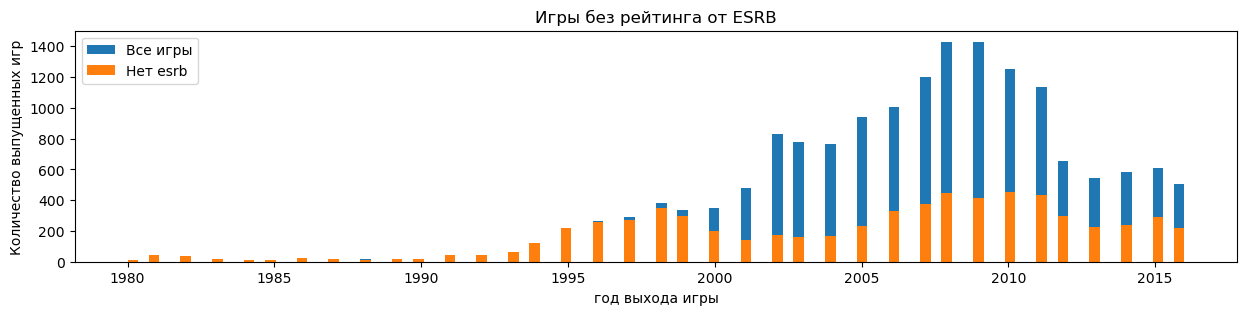

In [25]:
fig, ax = plt.subplots(figsize=(15,3))

ax.hist(d_games['year_of_release'], bins=100, label='Все игры')
ax.hist(d_games.loc[d_games.esrb_rating.isna(), 'year_of_release'], bins=100, label='Нет esrb')
ax.set_title('Игры без рейтинга от ESRB') 
ax.set_xlabel('год выхода игры')
ax.set_ylabel('Количество выпущенных игр')
ax.legend(loc='upper left');

Видим иллюстрацию цитаты из вики про ESRB:
> ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

Хоть сколько-то заметная доля игр с рейтингом прослеживается с 1996-го, с 2001-го игр без рейтинга от двадцати до 50% всего ежегодно.

Посмотрим, какие именно значения внутри:

In [26]:
d_games.esrb_rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
esrb_map = {'E' : '02_Everyone' , 'M' : '05_Mature_17+', 'T' : '04_Teen', 'E10+' : '03_Everyone_10+', \
            'K-A' : '02_Everyone', 'AO' : '06_Adults_Only_18+', 'EC' : '01_Early_childhood', 'RP' : '07_Rating_Pending'}
d_games.esrb_rating = d_games.esrb_rating.map(esrb_map)

esrb_rating
01_Early_childhood     0.08
02_Everyone           40.22
03_Everyone_10+       14.25
04_Teen               29.70
05_Mature_17+         15.70
06_Adults_Only_18+     0.01
07_Rating_Pending      0.01
Name: esrb_rating, dtype: float64

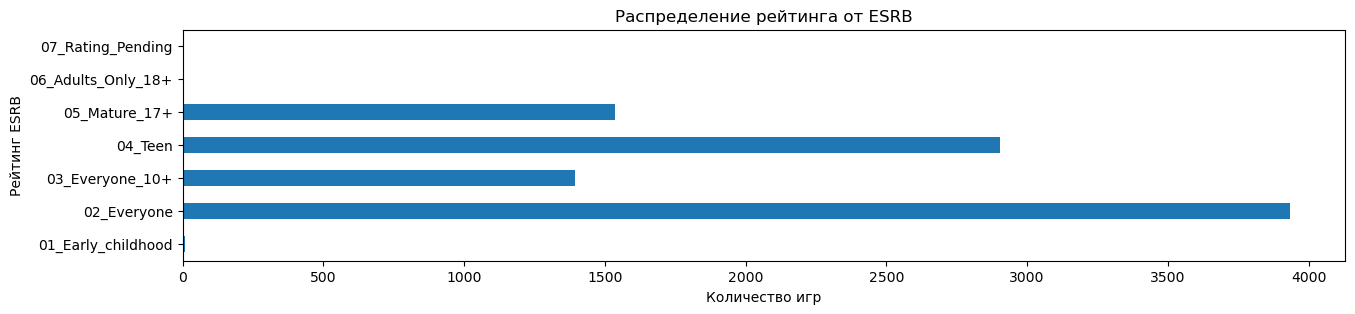

In [28]:
fig, ax = plt.subplots(figsize=(15, 3))
display(d_games.groupby('esrb_rating')['esrb_rating'].count() / d_games['esrb_rating'].count() * 100 // 0.01 / 100)

d_games.groupby('esrb_rating')['esrb_rating'].count().plot(kind = 'barh')
ax.set_title('Распределение рейтинга от ESRB') 
ax.set_xlabel('Количество игр') 
ax.set_ylabel('Рейтинг ESRB');

Похоже на правду -- 40% игр без возрастных ограничений, 30% игр для подростков, это подавляющее большинство.  
Игр 17+ и 10+ примерно поровну -- 14% и 17%  
Совсем детских игр, игр 18+ и игр на рассмотрении изчезающе мало -- десятые процента.

Осталось заполнить пропуски значениями "00_No_rating"

In [29]:
d_games.loc[d_games['esrb_rating'].isna(), 'esrb_rating'] = '00_No_rating'

### 2.2 Явные и неявные дубликаты

Проверим на наличие полных дублей:

In [30]:
d_games.duplicated().sum()

0

Таких нет. Проверим по паре "Игра-Платформа"

In [31]:
d_games.loc[(d_games[['game', 'platform_name']].duplicated(keep=False) == True), :].sort_values(by='game')

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating
604,Madden NFL 13,PS3,PlayStation 3,Консоль,7,Sony,2012,Sports,2.11,0.22,0.00,0.23,83.0,55.0,02_Everyone
16230,Madden NFL 13,PS3,PlayStation 3,Консоль,7,Sony,2012,Sports,0.00,0.01,0.00,0.00,83.0,55.0,02_Everyone
1190,Need for Speed: Most Wanted,X360,Xbox 360,Консоль,7,Microsoft,2012,Racing,0.62,0.78,0.01,0.15,83.0,85.0,04_Teen
1591,Need for Speed: Most Wanted,X360,Xbox 360,Консоль,7,Microsoft,2005,Racing,1.00,0.13,0.02,0.10,83.0,85.0,04_Teen
5972,Need for Speed: Most Wanted,PC,Personal computer,ПК,-1,a lot of companies (for PC),2005,Racing,0.02,0.23,0.00,0.04,82.0,85.0,04_Teen
11715,Need for Speed: Most Wanted,PC,Personal computer,ПК,-1,a lot of companies (for PC),2012,Racing,0.00,0.06,0.00,0.02,82.0,85.0,04_Teen


Madden NFL 13 в строке 16230 удаляем - там продажи в следовых количествах, рейтинги приехали из 604-й строки.  

С NFS:MW сложнее. Она выходила и в 2005-м, и в 2012-м, и на Xbox 360, и на PC.  
Причем рейтинги явно в обе игры попали из какой-то одной в рамках платформы. После похода на Метакритик так и не понял, где чьи значения, оставлю как есть, на правду похоже в обоих случаях.

Поэтому ограничимся названием -- для NFS 2012-го добавим постфикс " 2012", заодно прокрыжим остальные платформы, которых не было в 2005-м.

In [32]:
d_games = d_games.drop(labels=16230)
d_games.loc[(d_games.game == 'Need for Speed: Most Wanted') & \
            (d_games.year_of_release == 2012), 'game'] = 'Need for Speed: Most Wanted 2012'
d_games = d_games.reset_index(drop=True)

In [33]:
d_games.loc[(d_games.game == 'Madden NFL 13') | \
            (d_games.game == 'Need for Speed: Most Wanted') | \
            (d_games.game == 'Need for Speed: Most Wanted 2012'), :].sort_values(by='game')

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_rating,user_rating,esrb_rating
506,Madden NFL 13,X360,Xbox 360,Консоль,7,Microsoft,2012,Sports,2.53,0.15,0.00,0.17,81.0,58.0,02_Everyone
603,Madden NFL 13,PS3,PlayStation 3,Консоль,7,Sony,2012,Sports,2.11,0.22,0.00,0.23,83.0,55.0,02_Everyone
5808,Madden NFL 13,PSV,PlayStation Vita,Портативка,8,Sony,2012,Sports,0.28,0.00,0.00,0.02,63.0,73.0,02_Everyone
6965,Madden NFL 13,WiiU,Wii U,Консоль,8,Nintendo,2012,Sports,0.21,0.00,0.00,0.02,75.0,67.0,02_Everyone
3938,Madden NFL 13,Wii,Nintendo Wii,Консоль,7,Nintendo,2012,Sports,0.47,0.00,0.00,0.03,NaN,73.0,02_Everyone
253,Need for Speed: Most Wanted,PS2,PlayStation 2,Консоль,6,Sony,2005,Racing,2.03,1.79,0.08,0.47,82.0,91.0,04_Teen
6382,Need for Speed: Most Wanted,GBA,Game Boy Advance,Портативка,6,Nintendo,2005,Racing,0.19,0.07,0.00,0.00,NaN,83.0,02_Everyone
6319,Need for Speed: Most Wanted,DS,Nintendo DS,Портативка,7,Nintendo,2005,Racing,0.24,0.01,0.00,0.02,45.0,61.0,02_Everyone
6186,Need for Speed: Most Wanted,WiiU,Wii U,Консоль,8,Nintendo,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,00_No_rating
5892,Need for Speed: Most Wanted,PC,Personal computer,ПК,-1,a lot of companies (for PC),2005,Racing,0.02,0.23,0.00,0.04,82.0,85.0,04_Teen


Похоже на правду.

Из непроверенного осталось -- неявные дубликаты для жанров

In [34]:
d_games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Тут все ОК, неявные дубликаты не найдены

### 2.3 Колонки с продажами

Предлагается:
1. Добавить колонку "total_sales" с суммой продаж по всему миру
2. Посмотреть, сколько игр с нулями по этой колонке

In [35]:
# Добавляем колонку total_sales
d_games.insert(12, 'total_sales', d_games.na_sales + d_games.eu_sales + d_games.jp_sales + d_games.other_sales)

In [36]:
# Выводим строки с нулями в ней:
d_games.loc[d_games.total_sales == 0, :]

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_rating,user_rating,esrb_rating
16419,G1 Jockey 4 2008,PS3,PlayStation 3,Консоль,7,Sony,2008,Sports,0.0,0.0,0.0,0.0,0.0,NaN,NaN,00_No_rating
16452,SCORE International Baja 1000: The Official Game,PS2,PlayStation 2,Консоль,6,Sony,2008,Racing,0.0,0.0,0.0,0.0,0.0,NaN,NaN,00_No_rating


Всего две игры, обе на PlayStation, обе 2008-го года.  
Они обе существуют, как-то продавались, но не были особенно популярными. Судя по всему, их продажи по регионам не превышали пяти тысяч копий. Но в списке они находятся легально, оставляем их.

### 2.4 Итоги обзора:

1. Удадлили строки
    - отсутствует year_of_release  
        254 шт
    - отсутствует game и genre
        2 шт
    - полный дубль по "игре-году и платорме"  
        "Madden NFL 13"	PlayStation 3	2012	
2. Добавлены столбцы
    - Полное название платформы
    - Тип платформы
    - Поколение платформы
    - Компания производитель/разработчик
    - Суммарыные продажи по миру
3. Изменены типы данных:
    - year_of_release -> int
    - user_rating -> float
4. Изменены значения
    - esrb_rating актуализировал по справочнику, заполнил NaN значениями
    - user_rating привел к critic_rating по диапазону

## Шаг 3. Исследовательский анализ данных

### 3.1 Игры по годам
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

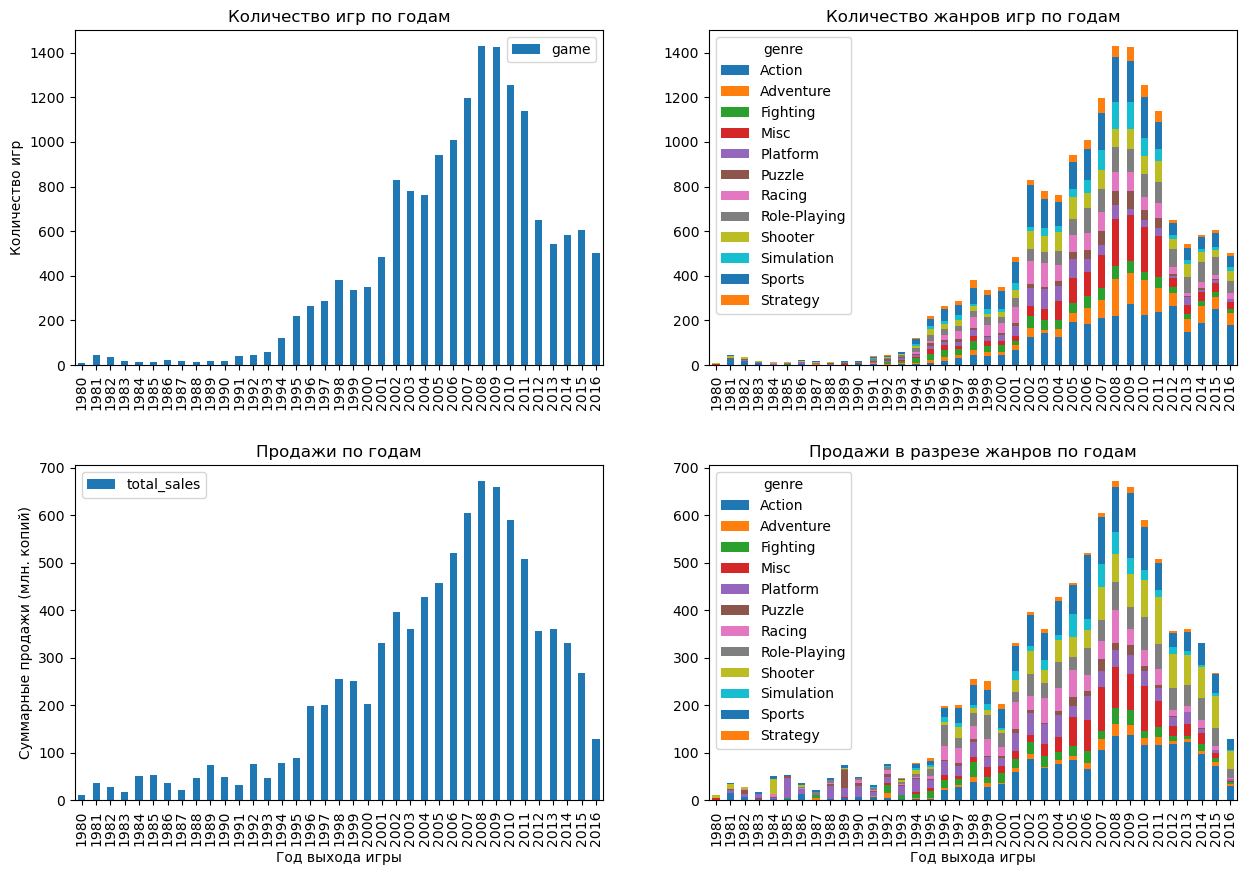

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.subplots_adjust(hspace=0.3)

d_games.pivot_table(index='year_of_release', aggfunc='count', values='game').plot(kind='bar', stacked='True', ax = axes[0, 0])
axes[0, 0].set_title('Количество игр по годам') 
axes[0, 0].set_ylabel('Количество игр')
axes[0, 0].set_xlabel('')

d_games.pivot_table(index='year_of_release', columns=['genre'], aggfunc='count', values='game').\
plot(kind='bar', stacked='True', ax = axes[0, 1])
axes[0, 1].set_title('Количество жанров игр по годам') 
axes[0, 1].set_xlabel('') 

d_games.pivot_table(index='year_of_release', aggfunc='sum', values='total_sales').\
plot(kind='bar', stacked='True', ax = axes[1, 0])
axes[1, 0].set_title('Продажи по годам')
axes[1, 0].set_xlabel('Год выхода игры')
axes[1, 0].set_ylabel('Суммарные продажи (млн. копий)') 

d_games.pivot_table(index='year_of_release', columns=['genre'], aggfunc='sum', values='total_sales').\
plot(kind='bar', stacked='True', ax = axes[1, 1])
axes[1, 1].set_title('Продажи в разрезе жанров по годам')
axes[1, 1].set_xlabel('Год выхода игры');

В игровой индустрии происходит много всего инересного, **на графиках мы видим**:

1. Бум выпуска и продаж игр с 2001 по 2008
2. Последствия кризиса 2008 года и общего удорожания производства игр -- спад выпуска и продаж с 2009-го года
3. Начало оказуаливания игр десятых годов двадцать первого века  
Если посмотреть на жанры, то в нулевые они были представлены намного более разнообразно -- сравнительно большие сегменты смешанного жанра, гонок, РПГ и спортивных игр. Потом их доля уменьшалась, на рынке продаются в основном шутеры и экшен-игры.
4. С 2011-го года продажи снижались плавнее, чем количество выпущенных игр

**На графиках мы не видим**:
1. DLC
2. Переизданий  
    С 2011-го где-то года хорошим тоном стало к каждой продаваемой игре выпускать сюжетные дополнения и переиздания с обновленнной графикой и игровыми мезаниками (за деньги, конечно)  
    На примере Скайрима, допустим, только я знаю три переиздания (LE, SE и AE) и два больших дополнения (Dragonborn и Dawnguard)  
    В датасете этого нет, поэтому предположу, что падение 2010 - 2012 в действительности было более плавным
    
PS А где инди-хорроры, которые с 2010-го где-то года заполонили Стим?

### 3.2 Платформы и продажи по годам

#### 3.2.1 Общие продажи  
Посмотрите, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?

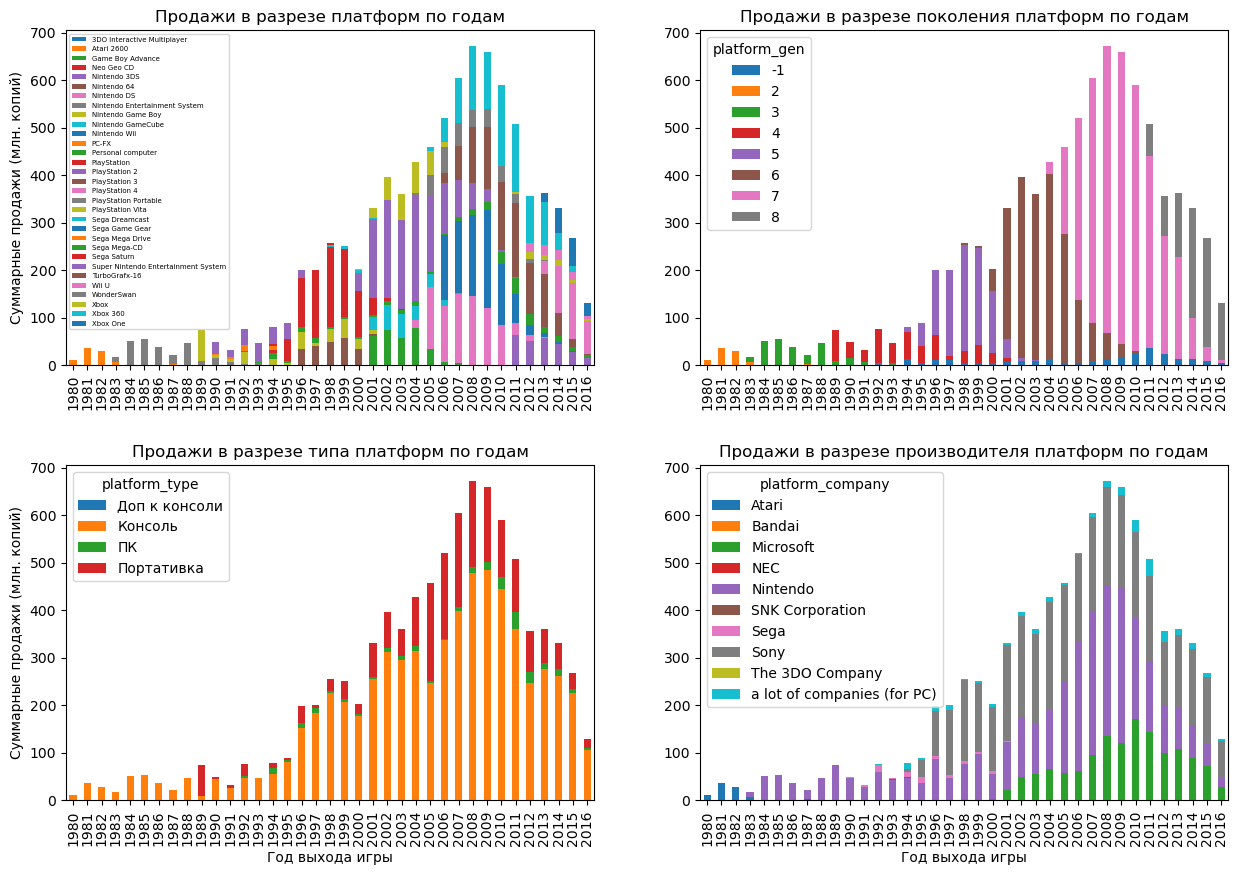

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.subplots_adjust(hspace=0.3) 

d_games.pivot_table(index='year_of_release', columns=['platform_name'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[0, 0])
axes[0, 0].legend(fontsize=5) 
axes[0, 0].set_title('Продажи в разрезе платформ по годам')  
axes[0, 0].set_ylabel('Суммарные продажи (млн. копий)')
axes[0, 0].set_xlabel('') 

d_games.pivot_table(index='year_of_release', columns=['platform_gen'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[0, 1])
axes[0, 1].set_title('Продажи в разрезе поколения платформ по годам') 
axes[0, 1].set_xlabel('') 

d_games.pivot_table(index='year_of_release', columns=['platform_type'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[1, 0])
axes[1, 0].set_title('Продажи в разрезе типа платформ по годам')
axes[1, 0].set_xlabel('Год выхода игры')
axes[1, 0].set_ylabel('Суммарные продажи (млн. копий)') 

d_games.pivot_table(index='year_of_release', columns=['platform_company'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[1, 1])
axes[1, 1].set_title('Продажи в разрезе производителя платформ по годам')  
axes[1, 1].set_xlabel('Год выхода игры');

Выводов по этим графикам можно сделать множество, вот некоторые из них:

* **Про жизненный цикл платформы**
    - В рамках каждого года на рынке представлены два-три поколения платформ (если грубо, то два)
    - Срок актуальности поколения от десяти до тринадцати лет
    - Каждый крупный производитель старается выпустить по флагману в поколение, чтоб в производстве игр ориентировались на него  
    Рассмотрим на примере седьмого поколения 2004 - 2016, например.  
    Выходят:
        + У **Sony** -- PalyStation3 и PSP (портативная консоль)
        + У **Microsoft** -- Xbox360
        + У **Nintendo** -- Nintendo WII и Nintendo DS (портативная консоль)  
    На левом верхнем графике видно, что с 2006-2007-х до 2011-2012-х годов для этих пяти платформ работала почти вся игровая индустрия
      
  
* **Про производителей**
    - **Atari** -- были пионерами в восьмидесятых, но уже тридцать лет как не особо актуальны
    - **Nintendo** -- самая стабильная компания, с 2013-го начала уступать свою долю в пользу Sony (но мы-то знаем, что в 2017-м году выйдет Nintendo Switch с Марио, Зельдой, Энимал кроссингом и Покемонами)
    - **Sega** -- попыталась ворваться в 1990-м, но закончилась в 2001-м, попутно выпустив приставку детства поколения восьмидесятых-девяностых на территории СНГ
    - **Sony** -- выпустила PlayStation в 1994-м, с тех пор на этой серии более-менее доминирует в индустрии
    - **Microsoft** -- осязаемо заявила о себе в 2001-м с Xbox, продолжила успешной Xbox360, но Xbox One, судя по всему, развить успех не сумела
  
  
  
* **Про классы игровых систем**
    - Почти во всей выборке в рамках каждого года доминируют игровые приставки  
    Кроме 1989-го, тогда все играли в Nintendo Game Boy =)) (если серьезно, то тут вопросы к выборке скорее)
    - С 2001-го по 2012-й заметно присутствие потративных игровых систем, таких как PlayStation Portable, Nintendo DS и Game Boy Advance
    - К 20016-му доля портативных игровых систем заметно снизилась (но мы-то знаем, что в 2022-м выйдет Steam Deck, на котором будут доступны почти все игры из Steam)
    - Удивила консолеориентированная выборка. С трудом верится, что на ПК игры не продаются -- Valve раскрутила свой Steam еще в начале десятых, с тех пор игры на ПК стало удобно покупать, а не пиратить

#### 3.2.2 Продажи TOP-10 платформ
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

Сформируем топ 10 платформ по продажам:

In [39]:
 # Выделяем top-10 платформ
top_ten_platf = d_games.groupby('platform_name')['total_sales'].sum().sort_values(ascending=False).head(10)
 # Показываем платформы с расширенным описанием
display(d_platform.set_index('platform_name').join(other=top_ten_platf, how='right').reset_index())

,platform_name,platform_reduct,platform_type,platform_gen,platform_company,total_sales
0,PlayStation 2,PS2,Консоль,6,Sony,1247.28
1,Xbox 360,X360,Консоль,7,Microsoft,961.30
2,PlayStation 3,PS3,Консоль,7,Sony,931.33
3,Nintendo Wii,Wii,Консоль,7,Nintendo,891.18
4,Nintendo DS,DS,Портативка,7,Nintendo,802.79
5,PlayStation,PS,Консоль,5,Sony,727.58
6,PlayStation 4,PS4,Консоль,8,Sony,314.14
7,Game Boy Advance,GBA,Портативка,6,Nintendo,312.88
8,PlayStation Portable,PSP,Портативка,7,Sony,289.54
9,Nintendo 3DS,3DS,Портативка,8,Nintendo,257.81


- Примерно пополам топ делят Nintendo и Sony, одна платформа от Microsoft
- Почти все платформы поколения 6+ (кроме первой плойки)  

Отфильтруем наш основной датафрейм по этому топу

In [40]:
d_games_top_10 = d_games.query('platform_name in @top_ten_platf.index')
display(d_games_top_10.head(5))
print(len(d_games_top_10), 'строк')

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_rating,user_rating,esrb_rating
0,Wii Sports,Wii,Nintendo Wii,Консоль,7,Nintendo,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,02_Everyone
2,Mario Kart Wii,Wii,Nintendo Wii,Консоль,7,Nintendo,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,02_Everyone
3,Wii Sports Resort,Wii,Nintendo Wii,Консоль,7,Nintendo,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,02_Everyone
6,New Super Mario Bros.,DS,Nintendo DS,Портативка,7,Nintendo,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,02_Everyone
7,Wii Play,Wii,Nintendo Wii,Консоль,7,Nintendo,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,02_Everyone


12180 строк


Похоже, получилось.

строим те же графики, но по отфильтрованному списку:

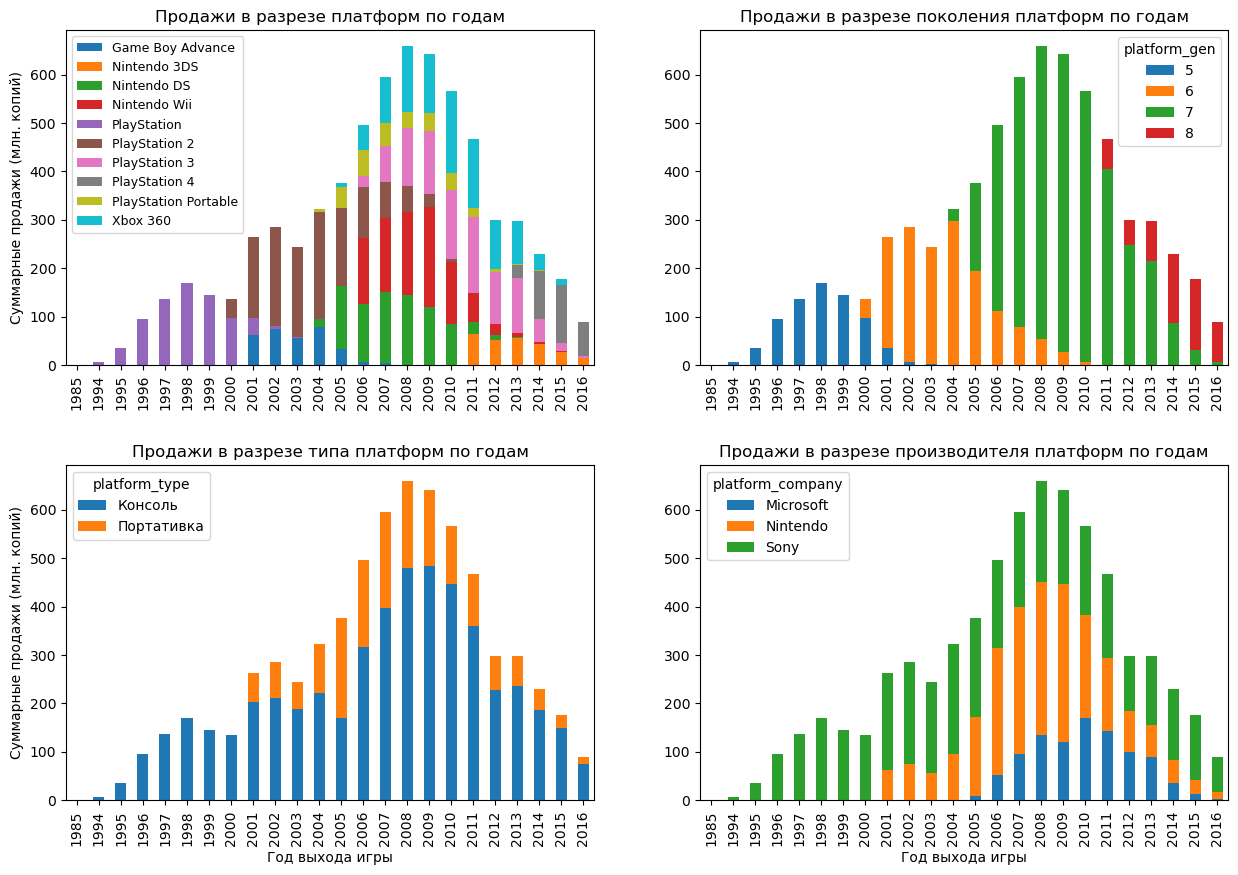

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.subplots_adjust(hspace=0.3)

d_games_top_10.pivot_table(index='year_of_release', columns=['platform_name'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[0, 0])
axes[0, 0].legend(fontsize=9)
axes[0, 0].set_title('Продажи в разрезе платформ по годам')
axes[0, 0].set_ylabel('Суммарные продажи (млн. копий)')
axes[0, 0].set_xlabel('')

d_games_top_10.pivot_table(index='year_of_release', columns=['platform_gen'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[0, 1])
axes[0, 1].set_title('Продажи в разрезе поколения платформ по годам')
axes[0, 1].set_xlabel('') 

d_games_top_10.pivot_table(index='year_of_release', columns=['platform_type'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[1, 0])
axes[1, 0].set_title('Продажи в разрезе типа платформ по годам')
axes[1, 0].set_xlabel('Год выхода игры')
axes[1, 0].set_ylabel('Суммарные продажи (млн. копий)')

d_games_top_10.pivot_table(index='year_of_release', columns=['platform_company'], aggfunc='sum', values='total_sales')\
.plot(kind='bar', stacked='True', ax=axes[1, 1])
axes[1, 1].set_title('Продажи в разрезе производителя платформ по годам')
axes[1, 1].set_xlabel('Год выхода игры');

Выводы, по большому счету, можно сделать те же, что и в п. 3.2.2, но графики, безусловно, красивее, нагляднее и более выпукло иллюстрируют описанные тенденции.  

Разве что, можно отметить, что у Nintendo с 1994 по 2000 не было top-10 платформы (в отличие от графика со всеми платформами), в этот период PlayStation конкурировала сама с собой

**NB!** Единственный вопрос -- что за игра такая в 1985-м году вышла, а в топ-10 платформ попала?

In [42]:
d_games_top_10.loc[d_games_top_10.year_of_release == 1985]

,game,platform_reduct,platform_name,platform_type,platform_gen,platform_company,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_rating,user_rating,esrb_rating
15717,Strongest Tokyo University Shogi DS,DS,Nintendo DS,Портативка,7,Nintendo,1985,Action,0.0,0.0,0.02,0.0,0.02,NaN,NaN,00_No_rating


Смотрим дату выхода: **Strongest Tokyo University Shogi DS** -- Released date: 10 May **2007**

Еще один вопрос к составителю источника =))

Поправим, так или иначе:

In [43]:
d_games_top_10.loc[d_games_top_10.game == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007
d_games.loc[d_games.game == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

### 3.3 Определение "актуального периода"

Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
Не учитывайте в работе данные за **предыдущие годы**.


Предлагаю следующий подход.

На 2016-й актуальны игры на платформах седьмого и восьмого поколений, но седьмое уже на излете, в 2017-м игр выходить на нем не будет особо. В 2017-м будут актуальны PlayStation 4 и Xbox One. На начало 2017-го еще анонсировали Nintendo Switch, которая оценвается как консоль между восьмым и девятым поколениями.

**Поэтому для 2017-го будем рассматривать консоли 8+, а это значит, что следует ограничиться 2011-м годом включительно.**

### 3.4 Лидеры продаж в актуальном периоде

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [44]:
d_games_aktuell = d_games.loc[d_games.year_of_release >= 2014, :].reset_index(drop=True) # Ограничиваем датафрейм 2011-м годом

В этот раз используем линии, чтоб нагляднее была динамика продаж:

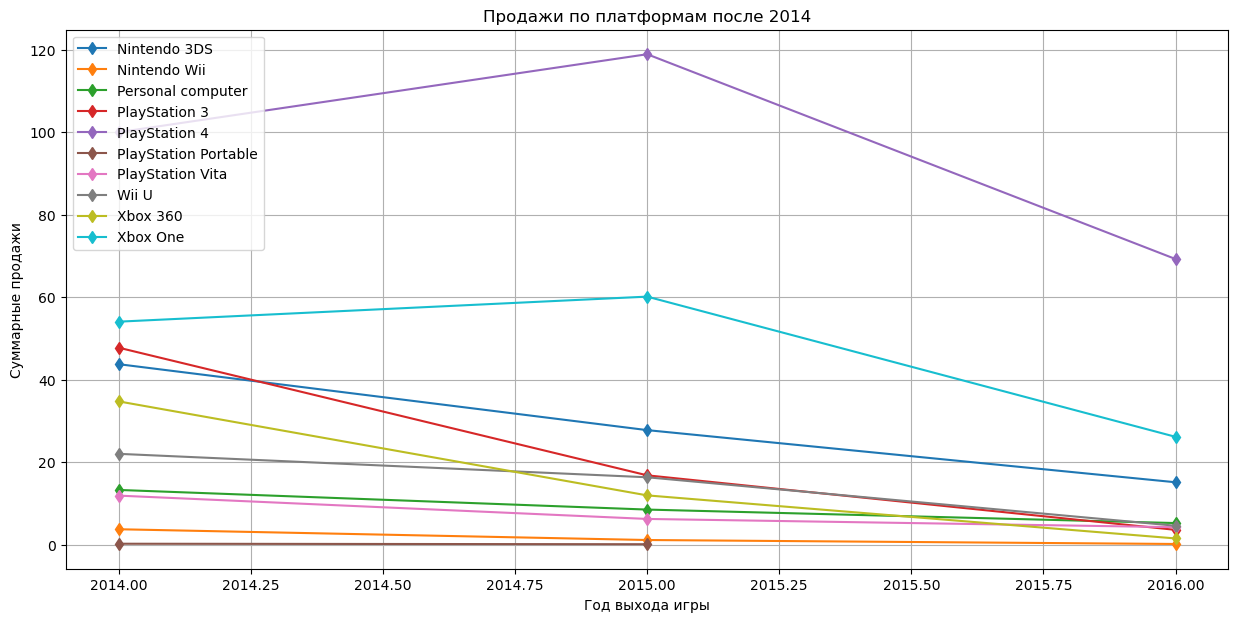

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
d_games_aktuell.pivot_table(index='year_of_release', columns=['platform_name'], aggfunc='sum', values='total_sales')\
.plot(marker='d', ax=axes, grid=True)
axes.set_title('Продажи по платформам после 2014')
axes.set_xlabel('Год выхода игры')
axes.set_ylabel('Суммарные продажи')
axes.legend(loc='upper left');

Скорее всего, данные за 2016-й у нас действительно неполные. ШТОШ  
Даже если и так, то:
- растут всего две платформы -- PlayStation 4 и Xbox One  
- особенно драматичное падение у Xbox 360 и Nintendo Wii и Playstation 3
- ПеКа гейминг стабильно на дне по продажам
- не смогла достичь 2016 года -- PlayStation Portable, на нее смотреть не будем.

Тут ничего особо интересного -- наблюдаем смену поколений с седьмого на восьмое.  
Разве что, отметим, что на 2016-й у Nintendo нет конкурентной консоли восьмого поколения -- Nintendo Wii U и Nintendo 3DS показывают себя относительно хуже в части продажи игр на них. Но напоминаю, в начале 2017-го выйдет Nintendo Switch.

### 3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  

Рассмотрим платформы, которые актуальны на 2016-й год, как решили в п.3.4.

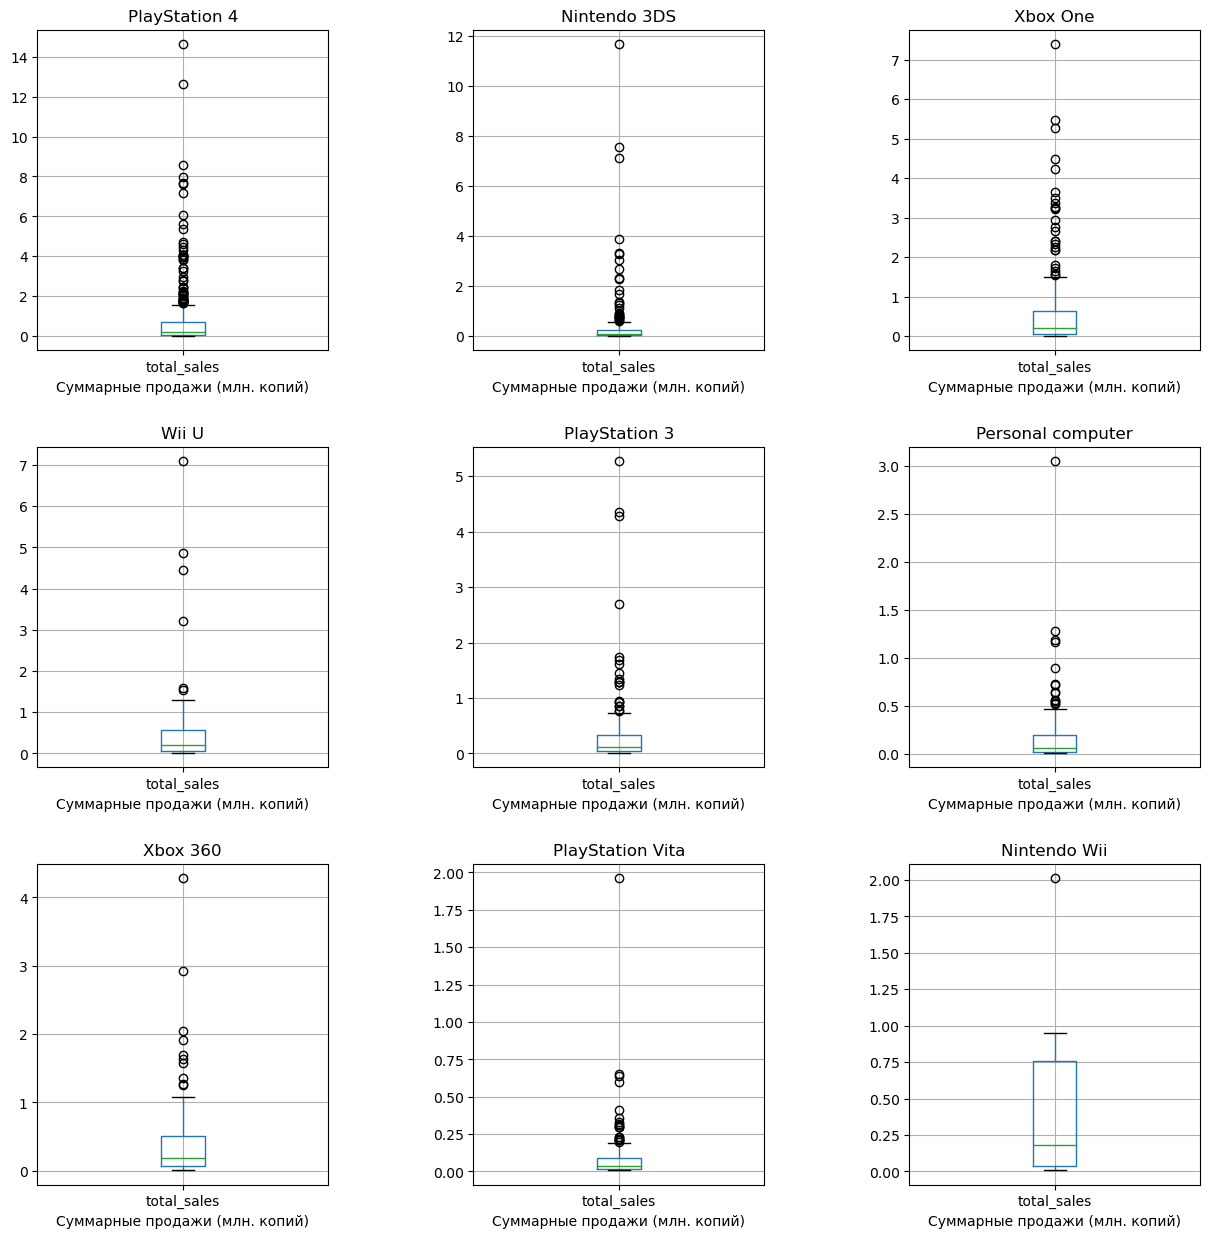

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3, wspace=0.5)

# Ограничиваем игры по выводам из П.3.4
platf_for_plot = d_games_aktuell.loc[d_games_aktuell.year_of_release == 2016, 'platform_name'].unique() 

for i in range(9):
    d_games_aktuell.loc[d_games_aktuell.platform_name == platf_for_plot[i], :].boxplot(column='total_sales', \
                                                                                       ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(platf_for_plot[i]) # Задаю заголовок 
    axes[i // 3, i % 3].set_xlabel('Суммарные продажи (млн. копий)')

Для каждой платформы наблюдаем существенные выбросы в плюс.  
На мой взгляд, это отражает объективную реальность, данную нам в ощущениях -- для каждой более-менее популярной платформы можно выделить десяток-другой игр, ради которых устройство и покупают. Они и будут продаваться кратно лучше 90% остальных игр.

Посмотрим, как поведут себя графики на едином поле в общем масштабе с ограничением по количеству продаж.

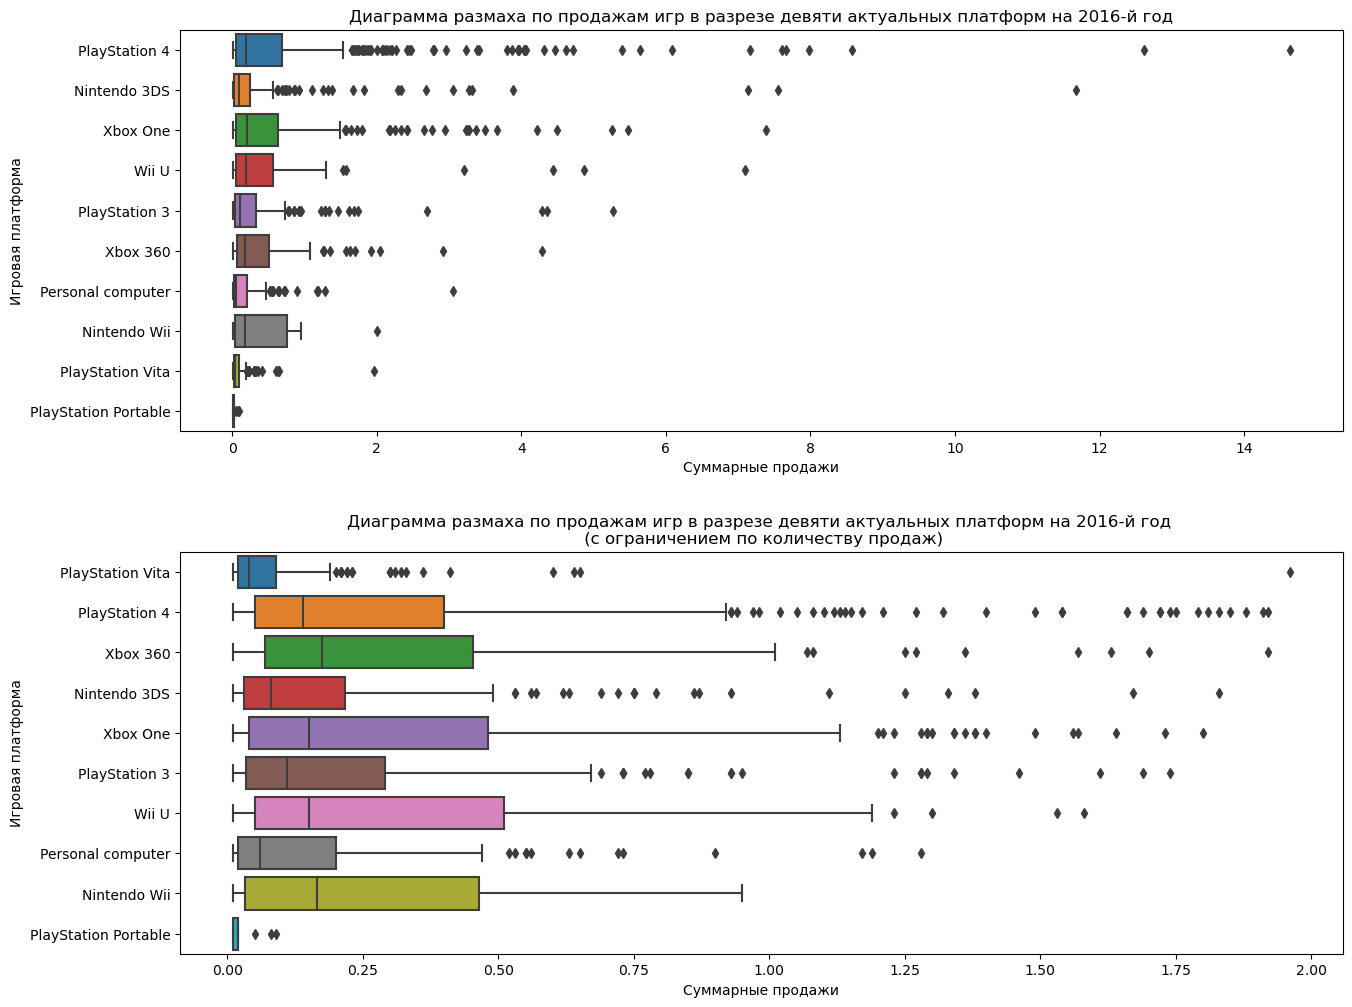

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

sns.boxplot(x='total_sales', y='platform_name', data=d_games_aktuell.loc[:, ['total_sales', 'platform_name']], orient='h',\
           ax = axes[0])
axes[0].set_title('Диаграмма размаха по продажам игр в разрезе девяти актуальных платформ на 2016-й год')
axes[0].set_xlabel('Суммарные продажи')
axes[0].set_ylabel('Игровая платформа')

sns.boxplot(x='total_sales', y='platform_name', data=d_games_aktuell.loc[d_games_aktuell['total_sales'] <= 2,\
                                                                         ['total_sales', 'platform_name']], orient='h',\
           ax = axes[1])
axes[1].set_title('Диаграмма размаха по продажам игр в разрезе девяти актуальных \
платформ на 2016-й год \n (с ограничением по количеству продаж)')
axes[1].set_xlabel('Суммарные продажи')
axes[1].set_ylabel('Игровая платформа');

Дополнительно можно сделать вывод, что:
- Наиболее стабильная по продажам платформа -- Nintendo Wii
- Сравнительно самые значительные выбросы у Nintendo 3DS и PlayStation Vita

### 3.5 Влияние отзывов критиков и пользователей на продажи игр

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посмотрим в первую очередь на самую актуальную платформу 2016 года -- PlayStation 4.

Для начала определим функцию для отрисовки зависимостей:

In [48]:
def sales_depend (platform):
    print('Зависимость продаж игр на', platform ,'от рейтингов \n')
    print('Корреляционная зависимость продаж на', platform, 'и оценок критиков:')
    print(d_games_aktuell.loc[d_games_aktuell.platform_name == platform, :][['total_sales', 'critic_rating']].corr(), ' \n\n') # Сначала циферки
    print('Корреляционная зависимость продаж на', platform, 'и оценок пользователей:')
    print(d_games_aktuell.loc[d_games_aktuell.platform_name == platform, :][['total_sales', 'user_rating']].corr(), ' \n') # Сначала циферки
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
    plt.subplots_adjust(hspace=0.6)
    
    # Диаграмма критиков scatter без медианизации
    d_games_aktuell.loc[d_games_aktuell.platform_name == platform, :]\
     .plot(kind='scatter', x='critic_rating', y='total_sales', ax=axes[0, 0], grid=True, \
           alpha=0.5, title='Зависимость продаж в рамках платформы \n от оценок критиков') 
    axes[0, 0].set_xlabel('Рейтинг критиков') 
    axes[0, 0].set_ylabel('Суммарные продажи') 

    # для наглядности прогнал продажи через медиану
    d_games_aktuell.loc[d_games_aktuell.platform_name == platform, :]\
     .pivot_table(index='critic_rating', values='total_sales', aggfunc='median').reset_index().\
     plot(kind='scatter', x='critic_rating', y='total_sales', ax=axes[0, 1], grid=True, \
          title='Зависимость продаж в рамках платформы \n от оценок критиков (после median)') 
    axes[0, 1].set_xlabel('Рейтинг критиков') 
    axes[0, 1].set_ylabel('') 
    
    # Диаграмма пользователей scatter без медианизации
    d_games_aktuell.loc[d_games_aktuell.platform_name == platform, :]\
     .plot(kind='scatter', x='user_rating', y='total_sales', ax=axes[1, 0], grid=True, \
           alpha=0.5, title='Зависимость продаж в рамках платформы \n от оценок пользователей') 
    axes[1, 0].set_xlabel('Рейтинг пользователей') 
    axes[1, 0].set_ylabel('Суммарные продажи') 
    
     # для наглядности прогнал продажи через медиану
    d_games_aktuell.loc[d_games_aktuell.platform_name == platform, :]\
     .pivot_table(index='user_rating', values='total_sales', aggfunc='median').reset_index().\
     plot(kind='scatter', x='user_rating', y='total_sales', ax=axes[1, 1], grid=True, \
          title='Зависимость продаж в рамках платформы \n от оценок пользователей (после median)') 
    axes[1, 1].set_xlabel('Рейтинг пользователей') 
    axes[1, 1].set_ylabel('')

#### 3.5.1 Влияние отзывов критиков и пользователей на продажи игр на PlayStation 4

Зависимость продаж игр на PlayStation 4 от рейтингов 

Корреляционная зависимость продаж на PlayStation 4 и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.402661
critic_rating     0.402661       1.000000  


Корреляционная зависимость продаж на PlayStation 4 и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000    -0.040132
user_rating    -0.040132     1.000000  



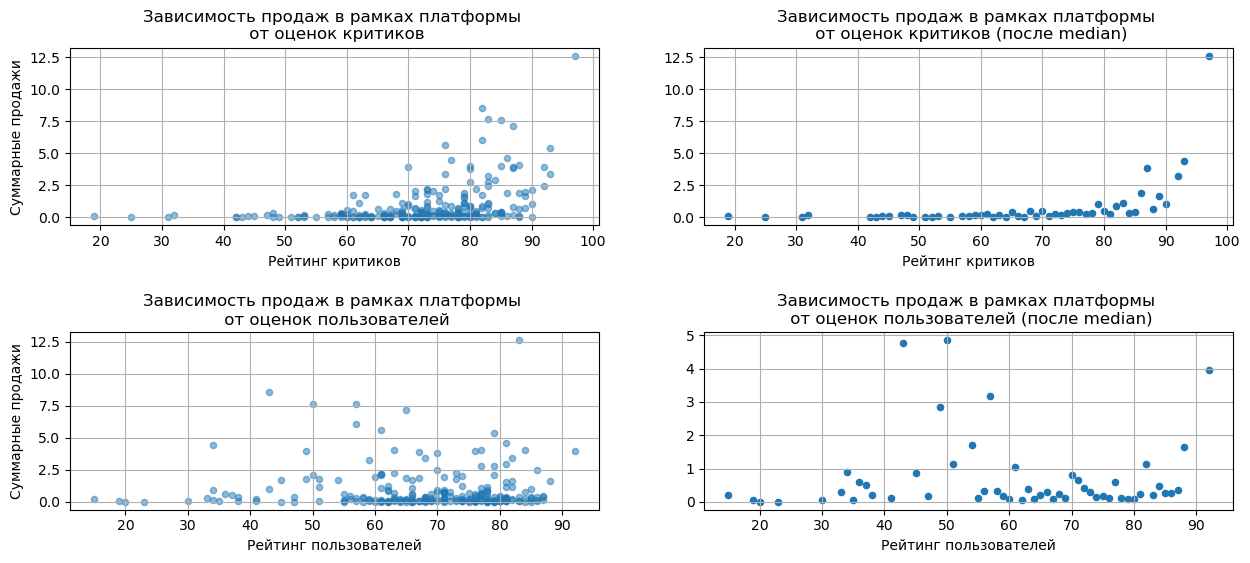

In [49]:
sales_depend('PlayStation 4')

**Вывод для Playtation 4:**
1. Оценки критиков средне-прямо связаны с продажами (с к-том 0,40)  
2. Связь между оценками пользователей и итоговыми продажами на обнаружена  

Посмотрим на остальные восемь платформ, сравнивая их с PlayStation 4:

#### 3.5.2 Влияние отзывов критиков и пользователей на продажи игр на Nintendo 3DS

Зависимость продаж игр на Nintendo 3DS от рейтингов 

Корреляционная зависимость продаж на Nintendo 3DS и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.314117
critic_rating     0.314117       1.000000  


Корреляционная зависимость продаж на Nintendo 3DS и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000     0.215193
user_rating     0.215193     1.000000  



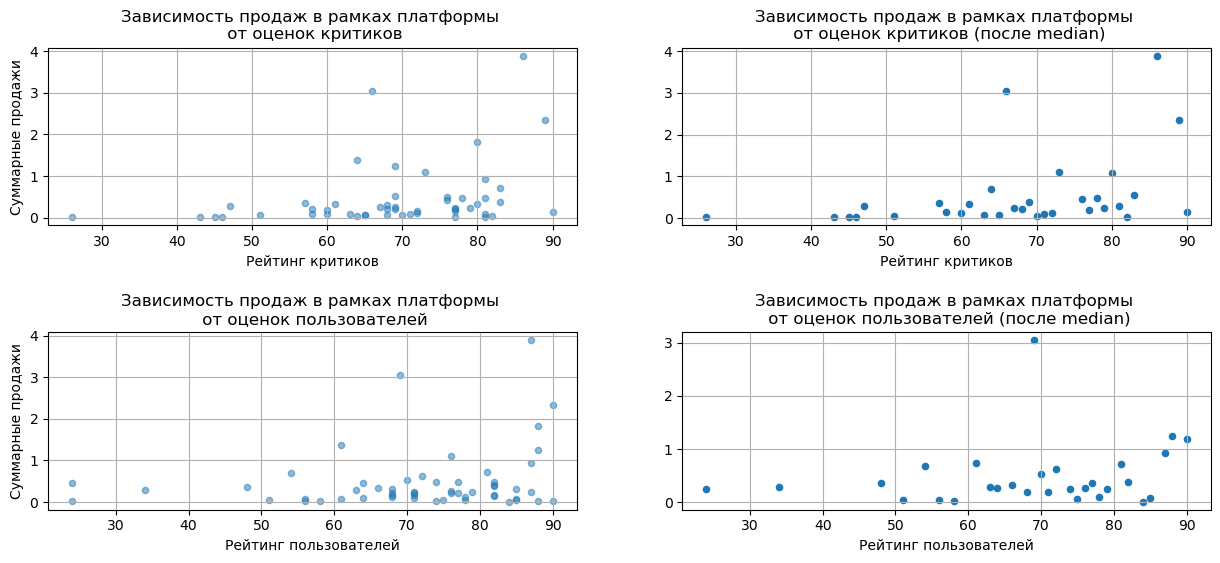

In [50]:
sales_depend('Nintendo 3DS')

**Вывод для Nintendo 3DS:**
1. Оценки критиков средне-прямо связаны с продажами, но несколько слабее, чем для PlayStation 4 (с к-том 0,31)  
2. Связь между оценками пользователей и итоговыми продажами слабая прямая, сильнее, чем для PlayStation 4 (с к-том 0,22)

#### 3.5.3 Влияние отзывов критиков и пользователей на продажи игр на Xbox One

Зависимость продаж игр на Xbox One от рейтингов 

Корреляционная зависимость продаж на Xbox One и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.428677
critic_rating     0.428677       1.000000  


Корреляционная зависимость продаж на Xbox One и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000    -0.070384
user_rating    -0.070384     1.000000  



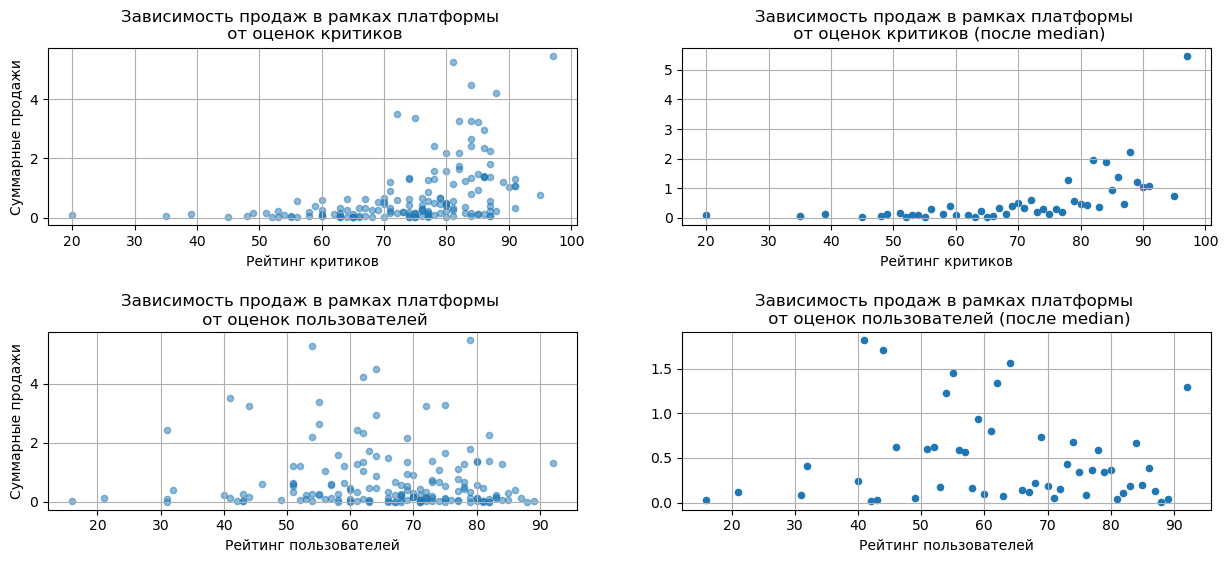

In [51]:
sales_depend('Xbox One')

**Вывод для Xbox One:**
1. Оценки критиков средне-прямо связаны с продажами, но несколько сильнее, чем для PlayStation 4 (с к-том 0,42)  
2. Связь между оценками пользователей и итоговыми продажами не обнаружена, как и для PlayStation 4

#### 3.5.4 Влияние отзывов критиков и пользователей на продажи игр на Wii U

Зависимость продаж игр на Wii U от рейтингов 

Корреляционная зависимость продаж на Wii U и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.370201
critic_rating     0.370201       1.000000  


Корреляционная зависимость продаж на Wii U и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000     0.407926
user_rating     0.407926     1.000000  



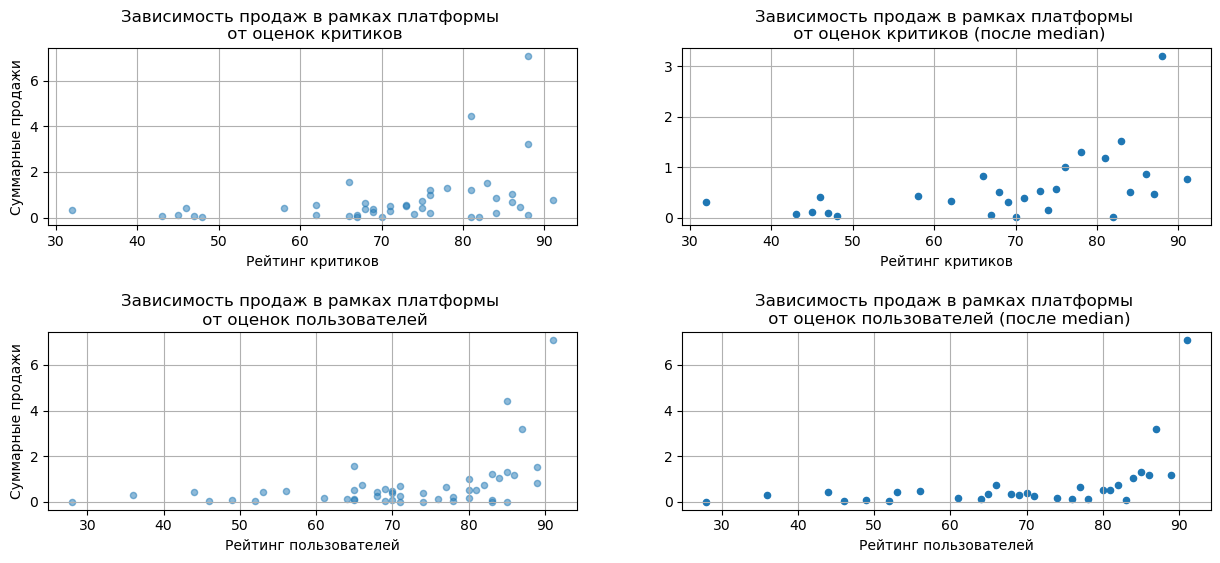

In [52]:
sales_depend('Wii U')

**Вывод для Wii U:**
1. Оценки критиков средне-прямо связаны с продажами, но несколько слабее, чем для PlayStation 4 (с к-том 0,37)  
2. Связь между оценками пользователей и итоговыми продажами прямая, сильнее, чем для PlayStation 4 (с к-том 0,41)

#### 3.5.5 Влияние отзывов критиков и пользователей на продажи игр на PlayStation 3

Зависимость продаж игр на PlayStation 3 от рейтингов 

Корреляционная зависимость продаж на PlayStation 3 и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.446575
critic_rating     0.446575       1.000000  


Корреляционная зависимость продаж на PlayStation 3 и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000    -0.166761
user_rating    -0.166761     1.000000  



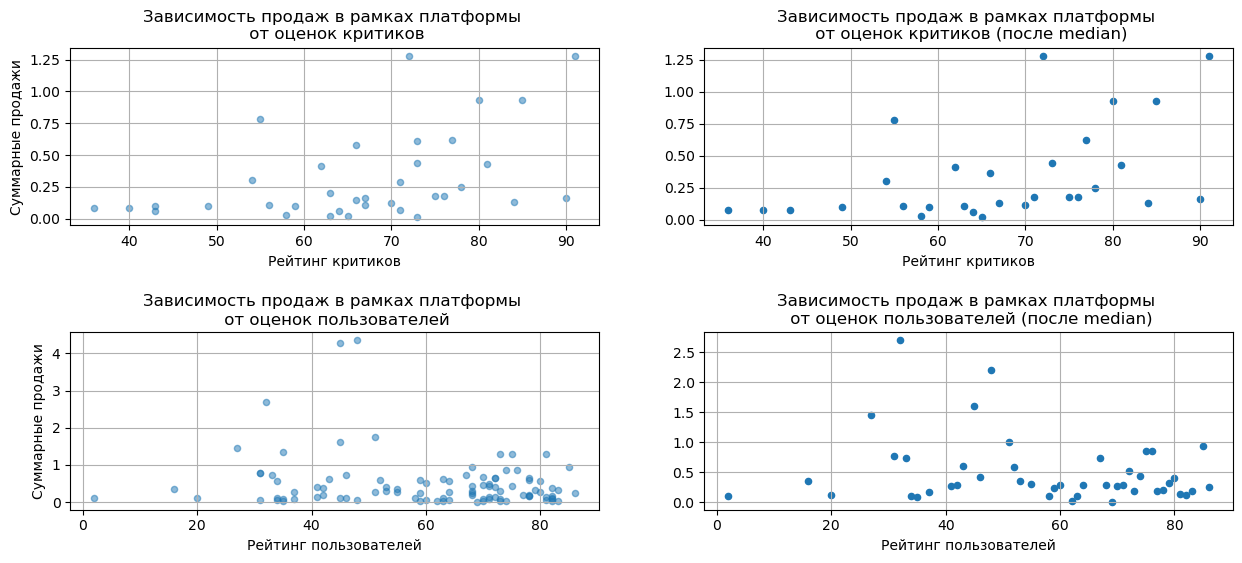

In [53]:
sales_depend('PlayStation 3')

**Вывод для PlayStation 3:**
1. Оценки критиков средне-прямо связаны с продажами, несколько сильнее, чем для PlayStation 4 (с к-том 0,45)  
2. Связь между оценками пользователей и итоговыми продажами не обнаружена, как и для PlayStation 4

#### 3.5.6 Влияние отзывов критиков и пользователей на продажи игр на Personal computer

Зависимость продаж игр на Personal computer от рейтингов 

Корреляционная зависимость продаж на Personal computer и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.174634
critic_rating     0.174634       1.000000  


Корреляционная зависимость продаж на Personal computer и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000    -0.071597
user_rating    -0.071597     1.000000  



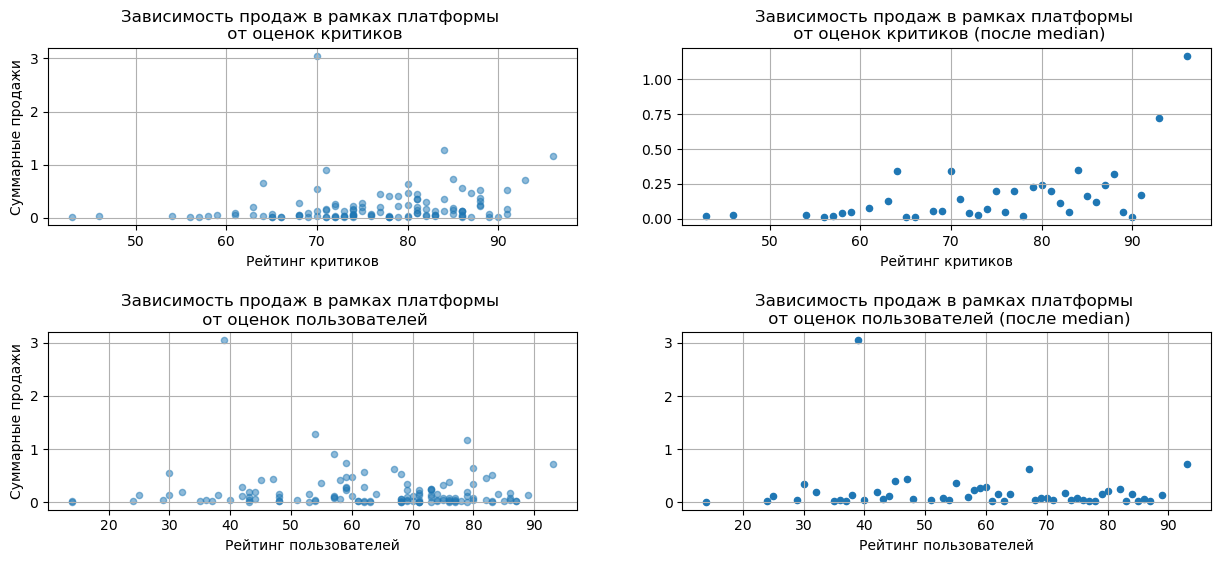

In [54]:
sales_depend('Personal computer')

**Вывод для PlayStation 3:**
1. Оценки критиков слабо-прямо связаны с продажами, заметно слабее, чем для PlayStation 4 (с к-том 0,17)  
2. Связь между оценками пользователей и итоговыми продажами не обнаружена, как и для PlayStation 4

#### 3.5.7 Влияние отзывов критиков и пользователей на продажи игр на Xbox 360

Зависимость продаж игр на Xbox 360 от рейтингов 

Корреляционная зависимость продаж на Xbox 360 и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.525723
critic_rating     0.525723       1.000000  


Корреляционная зависимость продаж на Xbox 360 и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000    -0.138445
user_rating    -0.138445     1.000000  



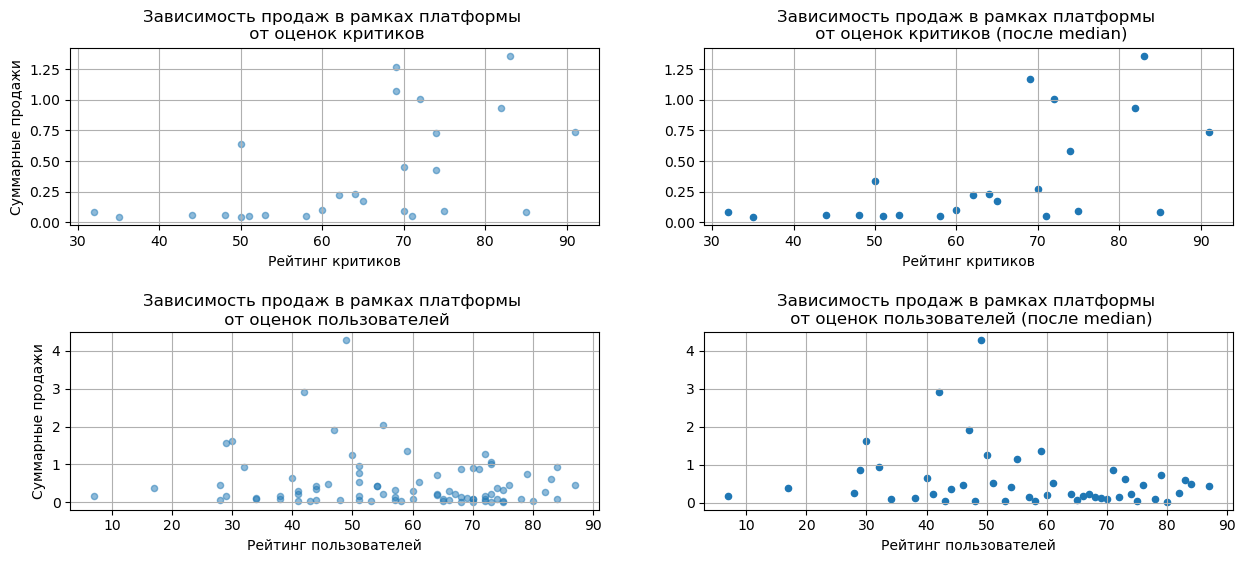

In [55]:
sales_depend('Xbox 360')

**Вывод для Xbox 360:**
1. Оценки критиков средне-прямо связаны с продажами, существенно сильнее, чем для PlayStation 4 (с к-том 0,53)  
2. Связь между оценками пользователей и итоговыми продажами не обнаружена, как и для PlayStation 4

#### 3.5.8 Влияние отзывов критиков и пользователей на продажи игр на PlayStation Vita

Зависимость продаж игр на PlayStation Vita от рейтингов 

Корреляционная зависимость продаж на PlayStation Vita и оценок критиков:
               total_sales  critic_rating
total_sales       1.000000       0.042665
critic_rating     0.042665       1.000000  


Корреляционная зависимость продаж на PlayStation Vita и оценок пользователей:
             total_sales  user_rating
total_sales     1.000000    -0.168455
user_rating    -0.168455     1.000000  



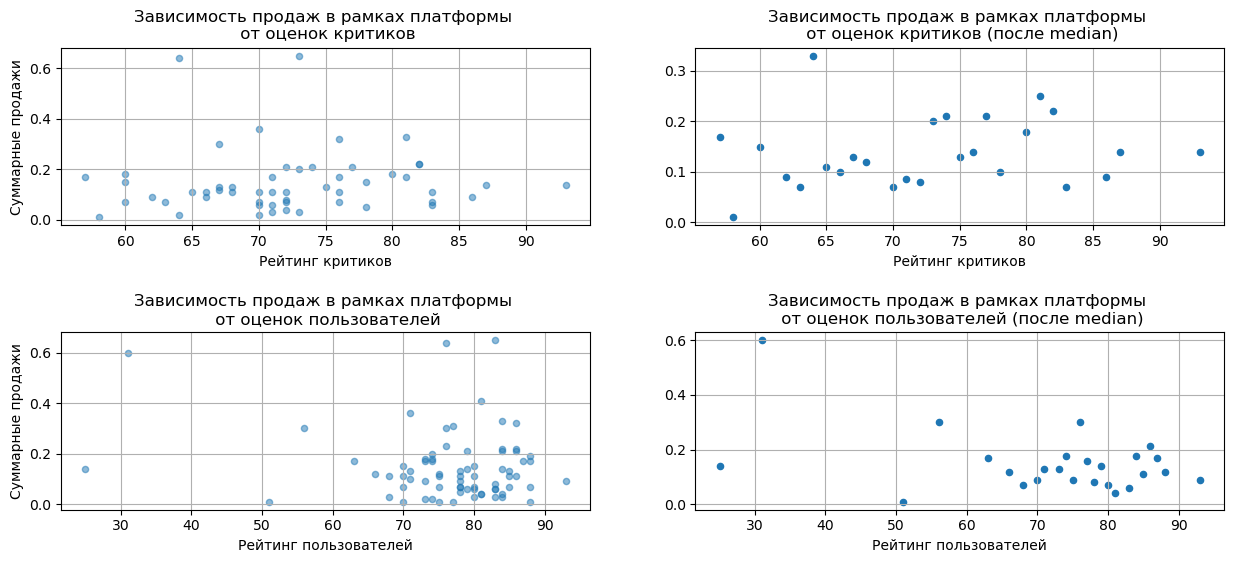

In [56]:
sales_depend('PlayStation Vita')

**Вывод для PlayStation Vita:**
1. Связь между оценками пользователей и итоговыми продажами не обнаружена
2. Связь между оценками пользователей и итоговыми продажами очень слабая прямая (с к-том 0,17)

#### 3.5.9 Общий вывод по связи рейтингов и продаж игр на актуальных на 2016-й год платформах

1. Связь рейтинга и продаж либо средняя прямая, либо слабая прямая, либо отсутствует
2. Средняя связь межжу оценками критиков и продажами наболюдается чаще, чем для оценок пользователей (от 0,17 для PC до 0,53 для Xbox 360)
3. Для пользовательских оценок связь встречается редко -- три платформы из восьми:
    - PlayStation Vita -- 0,17
    - Wii U -- 0,41
    - Nintendo 3DS -- 0,22
4. Для пяти платформ из восьми связь между пользовательскими оценками и суммарными продажами обнаружить не удалось

## Шаг 4. Портрет пользователя каждого региона 

Определите для пользователя каждого региона (NA, EU, JP):
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.


Делаем соответсвующую функцию.  
Напоминаю, что данные мы смотрим с 2011-го включительно.

In [57]:
def regional_profile(region):
    
#     Делаем заготовки для заголовков графиков:
    if region == 'na_sales':
        reg_name = 'Северная Америка'
    elif region == 'eu_sales':
        reg_name = 'Европейский союз'
    elif region == 'jp_sales':
        reg_name = 'Япония'
    elif region == 'total_sales':
        reg_name = 'Весь мир'
    else:
        print('Некорректный ввод')
        return
        
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))
    plt.subplots_adjust(hspace=0.3, wspace=0.3) 
    
    d_games_aktuell.groupby('esrb_rating')[region].median().plot(kind='barh', ax=axes[0, 0])
    axes[0, 0].set_title('Медиана по продажам игр в зависимости от\nрейтинга ESRB в регионе ' + reg_name) 
    axes[0, 0].set_ylabel('ESRB рейтинг') 
    axes[0, 0].set_xlabel('Средние продажи по играм (млн. копий)') 
    
    d_games_aktuell.groupby('esrb_rating')[region].sum().plot(kind='barh', ax=axes[0, 1])
    axes[0, 1].set_title('Сумма по продажам игр в зависимости от\nрейтинга ESRB в регионе ' + reg_name) 
    axes[0, 1].set_ylabel('') 
    axes[0, 1].set_xlabel('Суммарные продажи по играм (млн. копий)') 
    
    d_games_aktuell.groupby('platform_name')[region].sum().sort_values(ascending=False).head(5).sort_values().plot(kind='barh', ax=axes[1, 0])
    axes[1, 0].set_title('TOP-5 игровых платформ в регионе ' + reg_name) 
    axes[1, 0].set_ylabel('Игровые платформы') 
    axes[1, 0].set_xlabel('Суммарные продажи по играм (млн. копий)') 
    
    d_games_aktuell.groupby('genre')[region].sum().sort_values(ascending=False).head(5).sort_values().plot(kind='barh', ax=axes[1, 1])
    axes[1, 1].set_title('TOP-5 жанров игр в регионе ' + reg_name) 
    axes[1, 1].set_ylabel('Жанры игр') 
    axes[1, 1].set_xlabel('Суммарные продажи по играм (млн. копий)') 

Посмотрим, какой портрет функция выдаст для всего мира по нашей выборке:

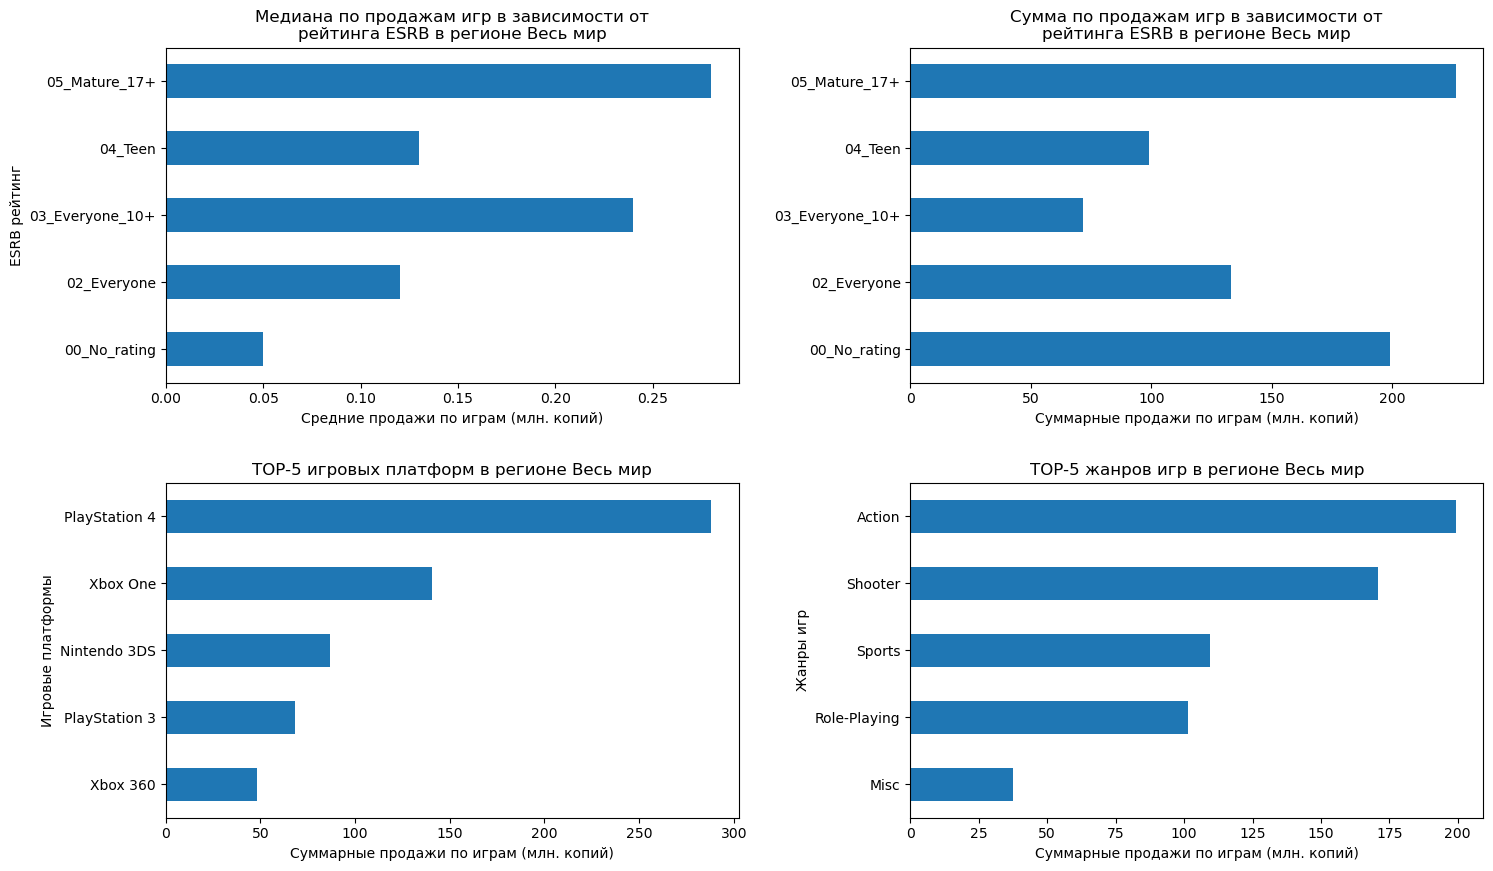

In [58]:
regional_profile('total_sales')

### 4.1 Портрет пользователя региона Северная Америка

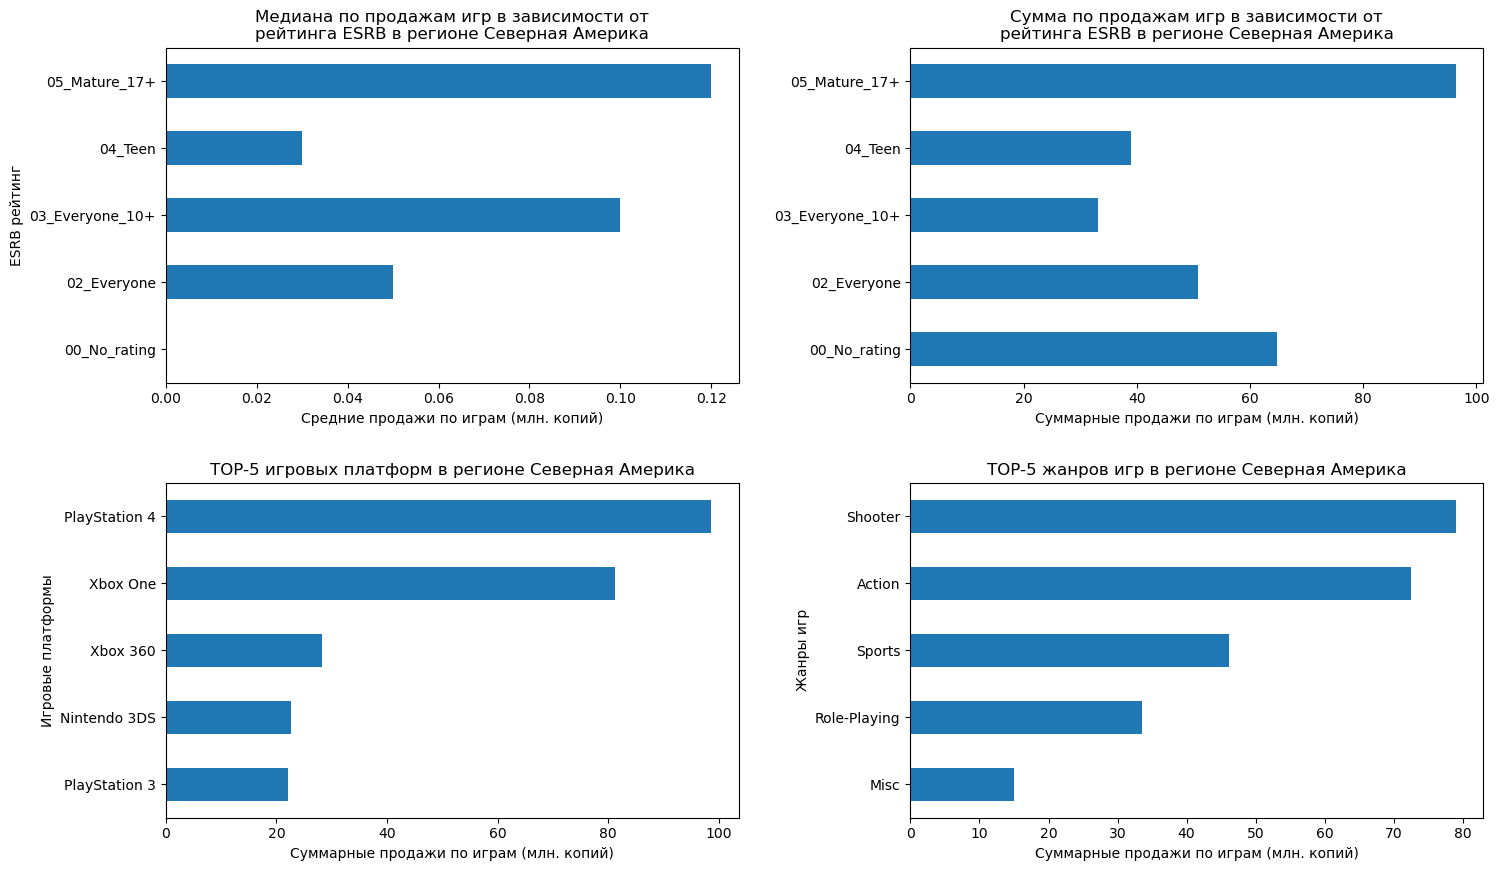

In [59]:
regional_profile('na_sales')

Локальные выводы:
1. **По рейтингу ESRB**
    - Лучше всего продаются игры "умеренно взрослые" в роде Call of Duty или GTA 5
    - Сравнительно плохо с продажами у игр для подростков
    - Игры 18+ в выборке за рассматриваемый период не предствалены  
    
2. **По платформам**
    - TOP-1 -- PlayStation 4 потеснила местные Xbox 360 и Xbox One от Microsoft
    
3. **По жанрам**
    - экшн-шутеры на первых двух местах, тут всё стандартно
    - спортивные ежегодники по традиционным американским видам спорта типа Madden NFL (американский футбол) или NBA (баскетбол) тоже неплохо продаются -- третье место

### 4.2 Портрет пользователя региона Европейский союз

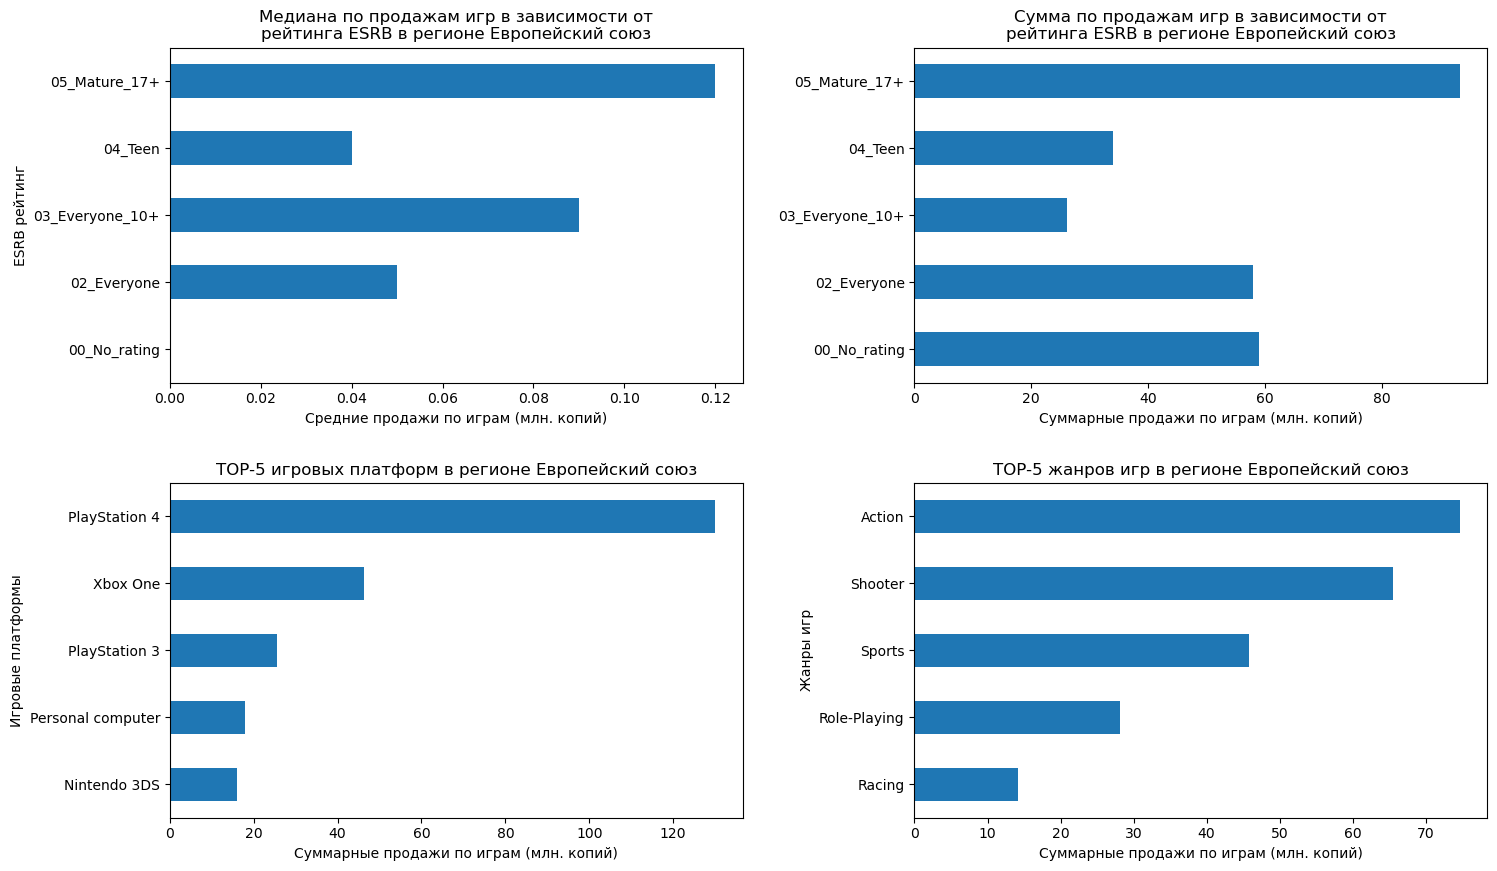

In [60]:
regional_profile('eu_sales')

Локальные выводы:
1. **По рейтингу ESRB**
    - Лучше всего продаются игры "умеренно взрослые"
    - Сравнительно плохо с продажами у игр для подростков
    - Игры 18+ в выборке за рассматриваемый период не предствалены
    - Различия со "в среднем по миру" косметические
2. **По платформам**
    - На вершине c большим отрывом консоль от Sony
    - Платформа линейки Xbox только одна -- Xbox One
    - На TOP-4 проникли персональные компьютеры!
3. **По жанрам**
    - Экшн-шутеры на первых двух местах, тут всё стандартно
    - Жанрово рыноки EU и североамериканский похожи друг на друга

### 4.3 Портрет пользователя региона Япония

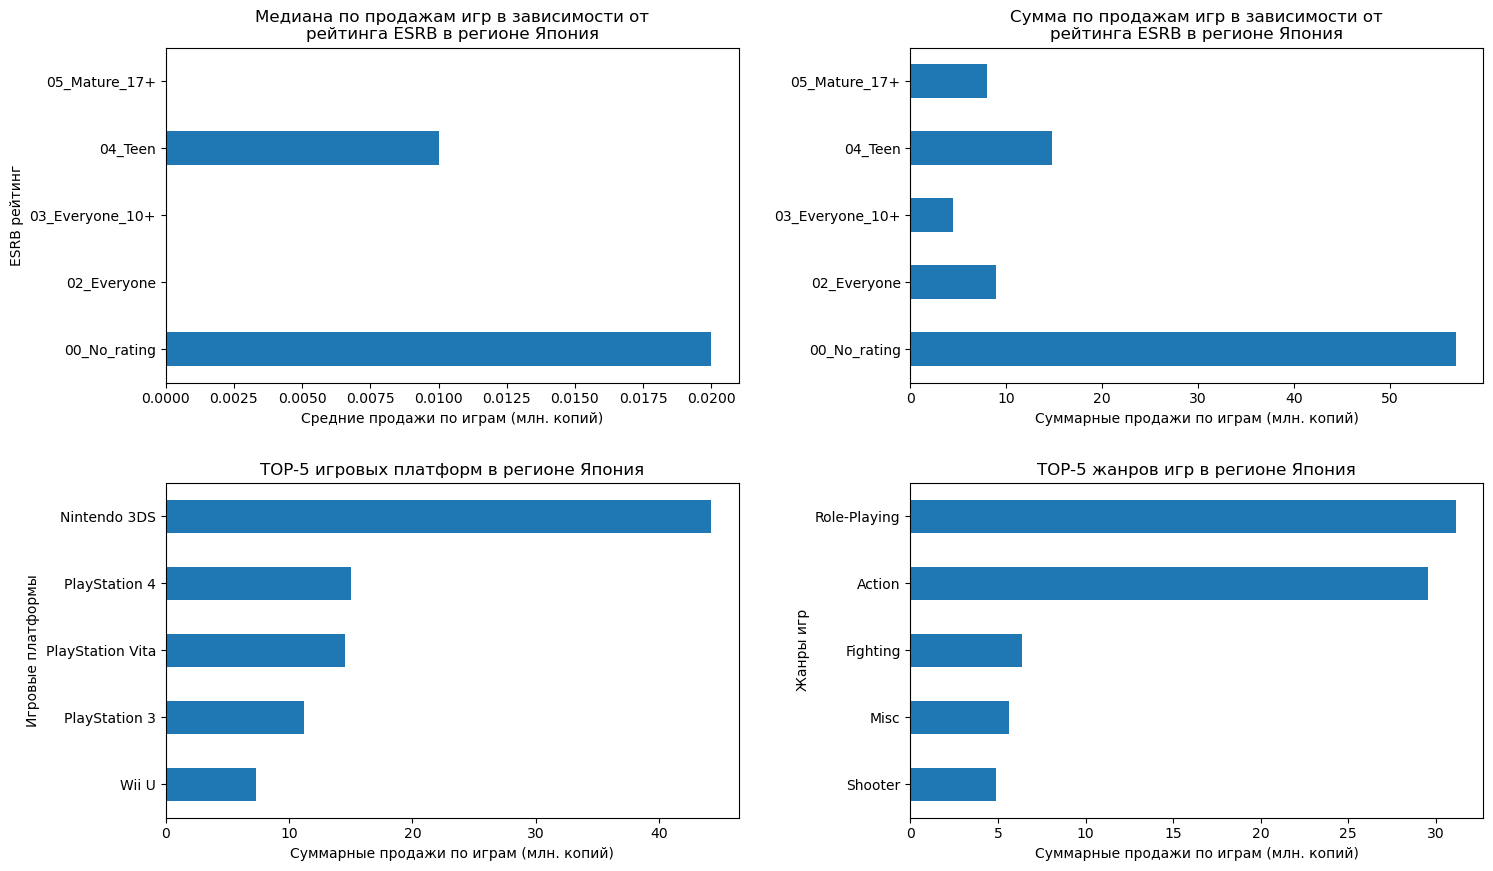

In [61]:
regional_profile('jp_sales')

Локальные выводы:
1. **По рейтингу ESRB**
    - Для Японии бессмысленнно, там вместо ESRB используют локальный рейтинг от CERO
    - Около половины игр с маркировкой от ESRB имеют нулевые продажи в Японии, что красноречиво нам показал график с медианами
    - По возрастным рейтингам вообще все еще сложнее -- в Европе используется PEGI, который сравнительно часто меняется и может отличаться от страны к стране. Это тема для отдельного большого исследования, на мой взгляд
2. **По платформам**
    - В топе три консоли от Sony, две от Nintendo (на первом и последнем месте), местный рынок доминирует 
    - В рейтинг попала портативная система (PlayStation Vita)
3. **По жанрам**
    - На первом месте ролевые игры, но следует понимать, то это не совсем RPG в классическом понимании, а JRPG (ru.wikipedia.org/wiki/Японская_ролевая_игра)
    - Место спортивных игр заняли файтинги -- Mortal Kombat и множество файтингов по аниме (по JoJo, Гандамам или Наруто, например)

### Шаг 5. Проверьте гипотезы

### 5.1 Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?

**Нулевая гипотеза:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:**

Средние пользовательские рейтинги платформ Xbox One и PC отличаются

**Метод:**

scipy.stats.ttest_ind() -- выборки Xbox One и PC независимы

alternative='two-sided'  


In [62]:
alpha = 0.05
results = st.ttest_ind(d_games_aktuell.loc[(d_games_aktuell.user_rating >= 0) & (d_games_aktuell.platform_name == 'Xbox One'), 'user_rating'],\
                       d_games_aktuell.loc[(d_games_aktuell.user_rating >= 0) & (d_games_aktuell.platform_name == 'Personal computer'), 'user_rating'])

print(f'p-value: {results.pvalue}')
print('Средний пользовательский рейтинг на Xbox One:', d_games_aktuell.loc[(d_games_aktuell.user_rating > 0) & (d_games_aktuell.platform_name == 'Xbox One'), 'user_rating'].mean())
print('Средний пользовательский рейтинг на Personal computer:', d_games_aktuell.loc[(d_games_aktuell.user_rating > 0) & (d_games_aktuell.platform_name == 'Personal computer'), 'user_rating'].mean())

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10450507919348478
Средний пользовательский рейтинг на Xbox One: 65.94545454545455
Средний пользовательский рейтинг на Personal computer: 62.98360655737705
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** нет оснований говорить, что пользовательские рейтинги платформ Xbox One и Personal computer различаются  
**NB!** Рассматривается актуальная выборка -- после 2011 года включительно. Если брать по всему периоду, то результат может быть обратный.

### 5.2 Разные ли средние пользовательские рейтинги жанров Action и Sports?

Тут ответ на вопрос будет обратен выводу, который мы получаем, сравнвая уровень статистической значимости с p-value

**Нулевая гипотеза:**

Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза:**

Средние пользовательские рейтинги жанров Action и Sports ощутимо отличаются

**Метод:**

scipy.stats.ttest_ind() -- выборки Action и Sports независимы

alternative='two-sided'

In [63]:
results = st.ttest_ind(d_games_aktuell.loc[(d_games_aktuell.user_rating >= 0) & (d_games_aktuell.genre == 'Action'), 'user_rating'],\
                       d_games_aktuell.loc[(d_games_aktuell.user_rating >= 0) & (d_games_aktuell.genre == 'Sports'), 'user_rating'])

print(f'p-value: {results.pvalue}')
print('Средний пользовательский рейтинг жанра Action:', d_games_aktuell.loc[(d_games_aktuell.user_rating > 0) & \
                                                                             (d_games_aktuell.genre == 'Action'), 'user_rating'].mean())
print('Средний пользовательский рейтинг жанра Sports:', d_games_aktuell.loc[(d_games_aktuell.user_rating > 0) & \
                                                                                    (d_games_aktuell.genre == 'Sports'), 'user_rating'].mean())

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.871114798510669e-19
Средний пользовательский рейтинг жанра Action: 67.60606060606061
Средний пользовательский рейтинг жанра Sports: 52.25196850393701
Отвергаем нулевую гипотезу


**Вывод:** Есть основания говорить, что пользовательские рейтинги жанров Action и Sports различаются  
**NB!** Рассматривается актуальная выборка -- после 2011 года включительно. Если брать по всему периоду, то результат может быть обратный.

### Общий вывод

В ходе исследования:

Получены данные об играх и их продажа. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, был подготовлен обзор данных

Проверены данные на ошибки и оценено их влияние на исследование. Затем на этапе предобработки были исправлены критичные ошибки данных. Далее было создано необходимое количество дополнительных колонок и таблиц для проведения анализа

Таким образом, исследование состояло из следующих, на каждом из которых формировались выводы, которые попали в итоги исследования:

    * Обзор данных
    * Предобработка данных
    * Исследовательский анализ данных
    * Составление портрета игрока по трем крупным регионам
    * Проверка гипотез

### Итоги исследования:

1. **Рекомендации в части данных**
* **Дата выхода игры**  
269 (1,6%) игр без года выхода, найдена одна ошибка  
Это важный атрибут, к которому следует внимательнее относиться при сборе данных
* **Оценки критиков и пользователей**  
40% пропущено для пользователей, 51% для критиков, источники данных непрозрачны
* **Дубли**  
Дублей немного, тут все ОК  
* **Рейтинг ESRB**  
ESRB -- сравнительно локальная система возрастного контроля, которая релевантна более для североамериканского рынка. В Японии и Европе распространены иные варианты ограничения контента.
Возможно, следует разработать метаоценку (вероятно, это сложно)

2. **Результаты исследования**
* **Исследования игр и жанров по хронологии:**
    - **В данных мы увидели:**
        + Бум выпуска и продаж игр с 2001 по 2008
        + Последствия кризиса 2008 года и общего удорожания производства игр -- спад выпуска и продаж с 2009-го года
        + Начало оказуаливания игр десятых годов двадцать первого века  
            Если посмотреть на жанры, то в нулевые они были представлены намного более разнообразно -- сравнительно большие сегменты смешанного жанра, гонок, РПГ и спортивных игр. Потом их доля уменьшалась, на рынке продаются в основном шутеры и экшен-игры.
        + С 2011-го года продажи снижались плавнее, чем количество выпущенных игр
    - **В данных мы не увидели:**
        + DLC
        + Переизданий  
            С 2011-го где-то года хорошим тоном стало к каждой продаваемой игре выпускать сюжетные дополнения и переиздания с обновленнной графикой и игровыми мезаниками    
В датасете этого нет, поэтому предположу, что падение 2010 - 2012 в действительности было более плавным
* **Исследования платформ и продаж по хронологии:**

    - **Жизненный цикл платформы**
        + В рамках каждого года на рынке представлены два-три поколения платформ (если грубо, то два)
        + Срок актуальности поколения от десяти до тринадцати лет
        + Каждый крупный производитель старается выпустить по флагману в поколение, чтоб в производстве игр ориентировались на него    
    - **Производители платформ**
        + **Atari** -- были пионерами в восьмидесятых, но уже тридцать лет как не особо актуальны
        + **Nintendo** -- самая стабильная компания, с 2013-го начала уступать свою долю в пользу Sony
        + **Sega** -- умеренно активна с 1990-го по 2001-й
        + **Sony** -- выпустила PlayStation в 1994-м, с тех пор доминирует в индустрии
        + **Microsoft** -- заявила о себе в 2001-м с Xbox, продолжила успешной Xbox360, но Xbox One развить успех не сумела  
  
  
    - **Про классы игровых систем**
        + Почти во всей выборке в рамках каждого года доминируют игровые приставки  
        + С 2001-го по 2012-й заметно присутствие потративных игровых систем, таких как PlayStation Portable, Nintendo DS и Game Boy Advance
        + К 20016-му доля портативных игровых систем заметно снизилась
        
* **Top-10 платформ:**  

|Название платформы|Тип платформы|	Поколение платформы|	Производитель/разработчик|	Общие продажи (млн. копий)|
|--|--|--|--|--|
|PlayStation 2|Игровая приставка	|6	|Sony|	1247.28|
|Xbox 360	|	Игровая приставка|	7|	Microsoft	|961.30|
|PlayStation 3|		Игровая приставка|	7	|Sony	|931.33|
|Nintendo Wii		|Игровая приставка	|7	|Nintendo	|891.18|
|Nintendo DS|	Портативная игровая система|	7	|Nintendo|	802.79|
|PlayStation|	Игровая приставка|	5	|Sony	|727.58|
|PlayStation 4|		Игровая приставка|	8	|Sony	|314.14|
|Game Boy Advance|		Портативная игровая система|	6	|Nintendo	|312.88|
|PlayStation Portable|	Портативная игровая система|	7	|Sony	|289.54|
|Nintendo 3DS	|	Портативная игровая система	|8	|Nintendo	|257.81|
* **Актуальный период исследования для проноза на 2017-й год и актуальные консоли**  
На 2016-й актуальны игры на платформах седьмого и восьмого поколений, но седьмое уже на излете, в 2017-м игр выходить на нем не будет особо.
Дальнейший анализ проводился на данных после 2014 года включительно.
**В 2017-м будут актуальны PlayStation 4 и Xbox One.** На начало 2017-го еще анонсировали **Nintendo Switch**, которая оценвается как консоль между восьмым и девятым поколениями.
* **Влияние отзывов критиков и пользователей на продажи игр**  
Исследование проводилось на восьми актуальных на 2016-й год платформах: PlayStation 3, Xbox 360, PlayStation 4, Nintendo 3DS, Nintendo DS, Xbox One, Wii U, Personal computer, PlayStation Vita, PlayStation Portable, PlayStation 2.
   - Связь рейтинга и продаж либо средняя прямая, либо слабая прямая, либо отсутствует
   - Средняя связь межжу оценками критиков и продажами наболюдается чаще, чем для оценок пользователей (от 0,17 для PC до 0,53 для Xbox 360)
   - Для пользовательских оценок связь встречается редко -- три платформы из восьми:
        + PlayStation Vita -- 0,17
        + Wii U -- 0,41
        + Nintendo 3DS -- 0,22
        + Для пяти платформ из восьми связь между пользовательскими оценками и суммарными продажами обнаружить не удалось
* **Портрет пользователя каждого региона**
    - Портрет пользователя региона **Северная Америка**
        + **По рейтингу ESRB**
            * Лучше всего продаются игры "умеренно взрослые" в роде Call of Duty или GTA 5
            * Сравнительно плохо с продажами у игр для подростков
            * Игры 18+ в выборке за рассматриваемый период не предствалены  
    
        + **По платформам**
            * TOP-1 -- PlayStation 4 потеснила местные Xbox 360 и Xbox One от Microsoft
            * Но суммарно по TOP-5 все же японские консоли продают игры немного лучше  
    
        + **По жанрам**
            * экшн-шутеры на первых двух местах, тут всё стандартно
            * спортивные ежегодники по традиционным американским видам спорта типа Madden NFL (американский футбол) или NBA (баскетбол) тоже неплохо продаются -- третье место
     - Портрет пользователя региона **Европейский союз**
        + **По рейтингу ESRB**
            * Лучше всего продаются игры "умеренно взрослые"
            * Сравнительно плохо с продажами у игр для подростков
            * Игры 18+ в выборке за рассматриваемый период не предствалены
            * Различия со "в среднем по миру" косметические
        + **По платформам**
            * На вершине c большим отрывом консоль от Sony
            * Платформа линейки Xbox только одна -- Xbox One
            * В TOP-4 проникли персональные компьютеры!
        + **По жанрам**
            * Экшн-шутеры на первых двух местах, тут всё стандартно
            * Жанрово рыноки EU и североамериканский похожи друг на друга
            
     - Портрет пользователя региона **Япония**
        + **По рейтингу ESRB**
            * Для Японии бессмысленнно, там вместо ESRB используют локальный рейтинг от CERO
            * Больше половины игр с маркировкой от ESRB имеют нулевые продажи в Японии
        + **По платформам**
            * В топе три консоли от Sony, две от Nintendo (на первом и последнем месте), местный рынок доминирует 
            * В рейтинге есть портативная платформа -- PlayStation Vita
        + **По жанрам**
            * На первом месте ролевые игры, но следует понимать, то это не совсем RPG в классическом понимании, а JRPG
            * В топе есть платформеры -- влиияние Марио от Нинтендо
            * Место спортивных игр заняли файтинги -- Mortal Kombat, например, и множество файтингов по аниме
* **Проверка гипотез** (на актуальной выборке -- после 2011 года включительно)
    - **Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?**
        + Нет оснований говорить, что пользовательские рейтинги платформ Xbox One и Personal computer различаются
    - **Разные ли средние пользовательские рейтинги жанров Action и Sports?**
        + Есть основания говорить, что пользовательские рейтинги жанров Action и Sports различаются

Рекомендации магазину видеоигр:
1. Наиболее перспективный рынок игрвых приставок восьмого поколения. В первую очередь -- PlayStation 4, Xbox One и Nintendo 3DS
2. Для рынков северной Америки и Европы будут актуальны акшн игры и шутеры для умеренно взрослой аудитории на платформах PS4 и Xbox One
3. Японский рынок заметно отличается от среднемирового, там актуальнее платформы от Nintendo в паритете с платформами от Sony, также там лучше продаются местные игры жанров JRPG и Fighting.